# Data Manipulation and Visualization - Lifestyle

# Prima analisi: dataset del World Happiness Report

## DISCOVERY
Il World Happiness Report è un rapporto annuale che classifica i paesi del mondo in base al loro livello di felicità. Questo rapporto è stato pubblicato per la prima volta nel 2012 dall'Agenzia delle Nazioni Unite per gli Affari Economici e Sociali (UNDESA) in collaborazione con la Columbia Business School.

Il World Happiness Report si basa su sei fattori:

- Reddito: Misura il prodotto interno lordo (PIL) pro capite, ovvero il valore di tutti i beni e servizi prodotti in un paese in un anno
- Salute: Valuta il sistema sanitario di un paese e rappresenta il punteggio attribuito.
- Libertà: Si riferisce alla libertà di scelta nella vita e si calcola come la media delle risposte nazionali a una specifica domanda:
    - "Sei soddisfatto o insoddisfatto della tua libertà di scegliere cosa fare della tua vita?"
- Generosità: Rappresenta la propensione delle persone a donare denaro in beneficenza rispetto al PIL pro capite
- Percezione della corruzione: Valuta la percezione complessiva della corruzione nel governo e nelle imprese attraverso domande binarie:
    - "La corruzione è diffusa nel governo o no?"
    - "La corruzione è diffusa nelle imprese o no?".
- Rappresenta la disponibilità di parenti o amici su cui fare affidamento in caso di difficoltà.


Il World Happiness Report rappresenta uno strumento essenziale per comprendere le cause della felicità e identificare politiche che possano migliorare il benessere delle persone.

__L'obiettivo di questa indagine è analizzare i fattori socio-economici che influenzano la felicità nelle diverse nazioni, esaminare come questi fattori siano cambiati nel corso del tempo e confrontare le diverse variabili socio-economiche tra i vari continenti.__


## DATA SELECTION
le fonti che vengono utilizzate sono dei dataset del World Happined Report presenti su kaggle, una tra le migliori piattaforme per i datascientist:
   * https://www.kaggle.com/datasets/unsdsn/world-happiness?datasetId=894&outputs=Data

si considerano i dati raccolti dal 2015 al 2019

In [663]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [664]:
whr_data_2015 = pd.read_csv('dataset_whr/2015.csv')
whr_data_2016 = pd.read_csv('dataset_whr/2016.csv')
whr_data_2017 = pd.read_csv('dataset_whr/2017.csv')
whr_data_2018 = pd.read_csv('dataset_whr/2018.csv')
whr_data_2019 = pd.read_csv('dataset_whr/2019.csv')

In [665]:
whr_data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [666]:
whr_data_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

per raggiungere l'obiettivo preposto, è stato deciso di analizzare le seguenti variabili per comprendere i vari fattori socio-economici:
   - gdp per capita
   - social support
   - healthy life expectancy
   - freedom to make life choices
   - perceptions of corruptions
   - generosity

si considerano le variabili "Country or region" e "Overall rank" per comprendere il punteggio ottenute dalle varie nazioni


<a name="toc_15456_1.1"></a>
## DATA CLEANING

In questa fase viene eliminata la colonna 'score' poiché non è rilevante per la nostra analisi.

In [667]:
column_to_delete = ["Score"]

whr_sub_data_2015 = whr_data_2015.drop(columns=["Happiness Score","Region", "Standard Error", "Dystopia Residual"], axis=1)
whr_sub_data_2015_region = whr_data_2015.drop(columns=["Happiness Score", "Standard Error", "Dystopia Residual"], axis=1)
whr_sub_data_2016 = whr_data_2016.drop(columns=["Happiness Score","Region", "Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis=1)
whr_sub_data_2017 = whr_data_2017.drop(columns=["Happiness.Score","Whisker.high", "Whisker.low", "Dystopia.Residual"], axis=1)
whr_sub_data_2018 = whr_data_2018.drop(columns=column_to_delete, axis=1)
whr_sub_data_2019 = whr_data_2019.drop(columns=column_to_delete, axis=1)

Nei prossimi passi, controlliamo se ci sono valori nulli o NaN nei dataset:

In [668]:
whr_sub_data_2018.isna().sum()

Overall rank                    0
Country or region               0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [669]:
whr_sub_data_2018.isnull().sum()


Overall rank                    0
Country or region               0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

Nel dataset WHR registrato nel 2018, è presente un valore mancante nella colonna 'perceptions of column' per la riga relativa agli Emirati Arabi. In questa situazione, sembra che il valore non sia stato registrato. Per evitare di rimuovere l'intera riga, viene inserito il valore 0.

In [670]:
whr_sub_data_2018 = whr_sub_data_2018.fillna(0)
whr_sub_data_2018.isna().sum()

Overall rank                    0
Country or region               0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [671]:
whr_sub_data_2018[whr_sub_data_2018["Country or region"] == "United Arab Emirates"]

,Overall rank,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,2.096,0.776,0.67,0.284,0.186,0.0


Dopo aver controllato tutti i csv che verranno analizzati, non sono stati trovati altri valori nulli o NaN

## DATA EXPLORATION

In [672]:
whr_sub_data_2015.describe()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [673]:
whr_sub_data_2015.dtypes

Country                           object
Happiness Rank                     int64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>],
       [<AxesSubplot:title={'center':'Generosity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

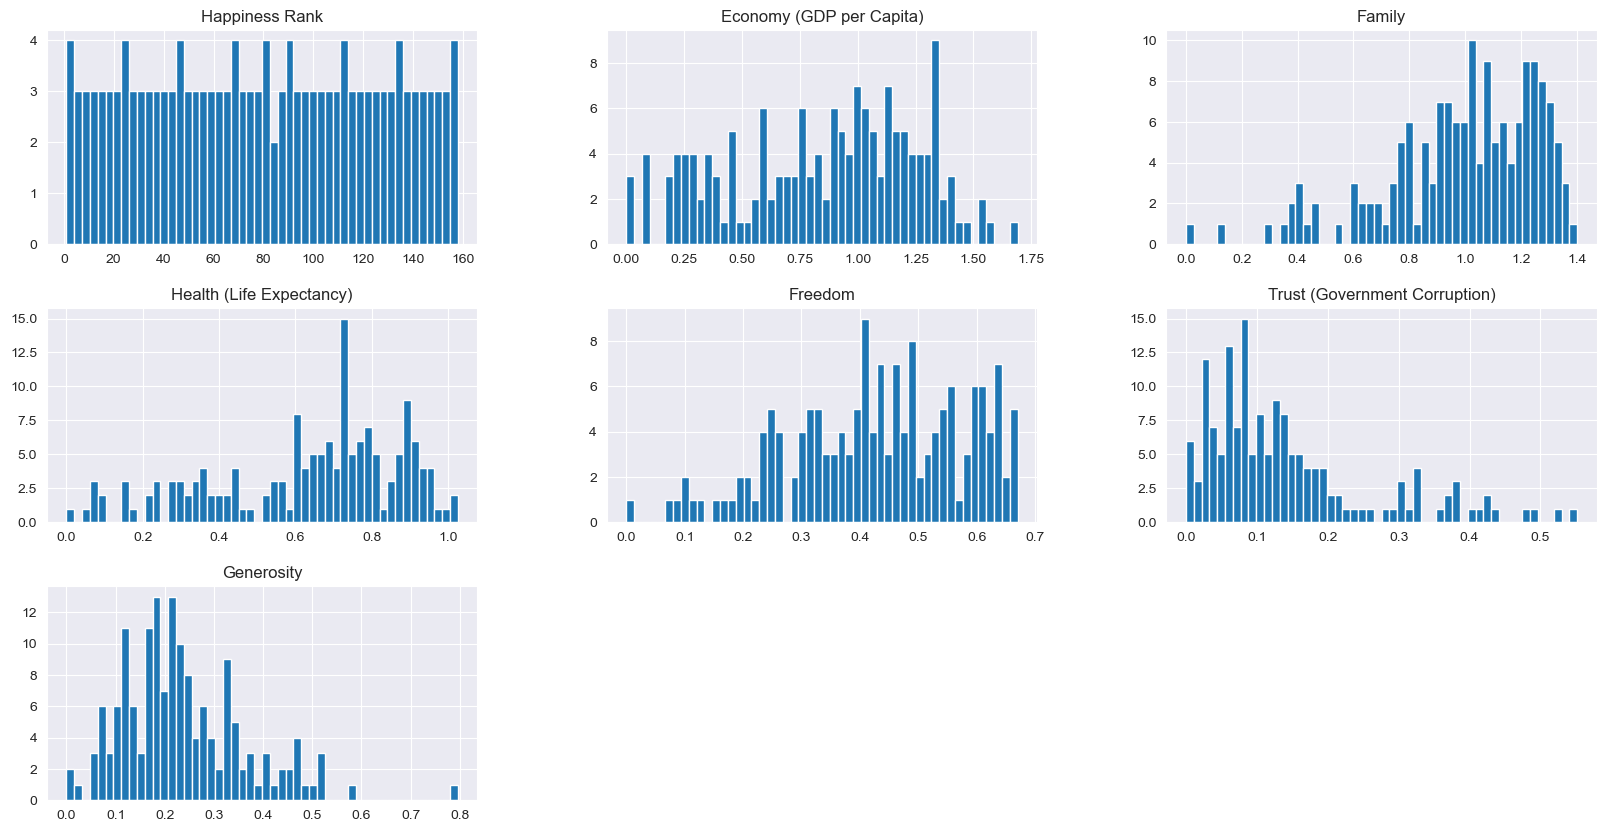

In [674]:
whr_sub_data_2015.hist(bins=50, figsize=(20,10))

<AxesSubplot:>

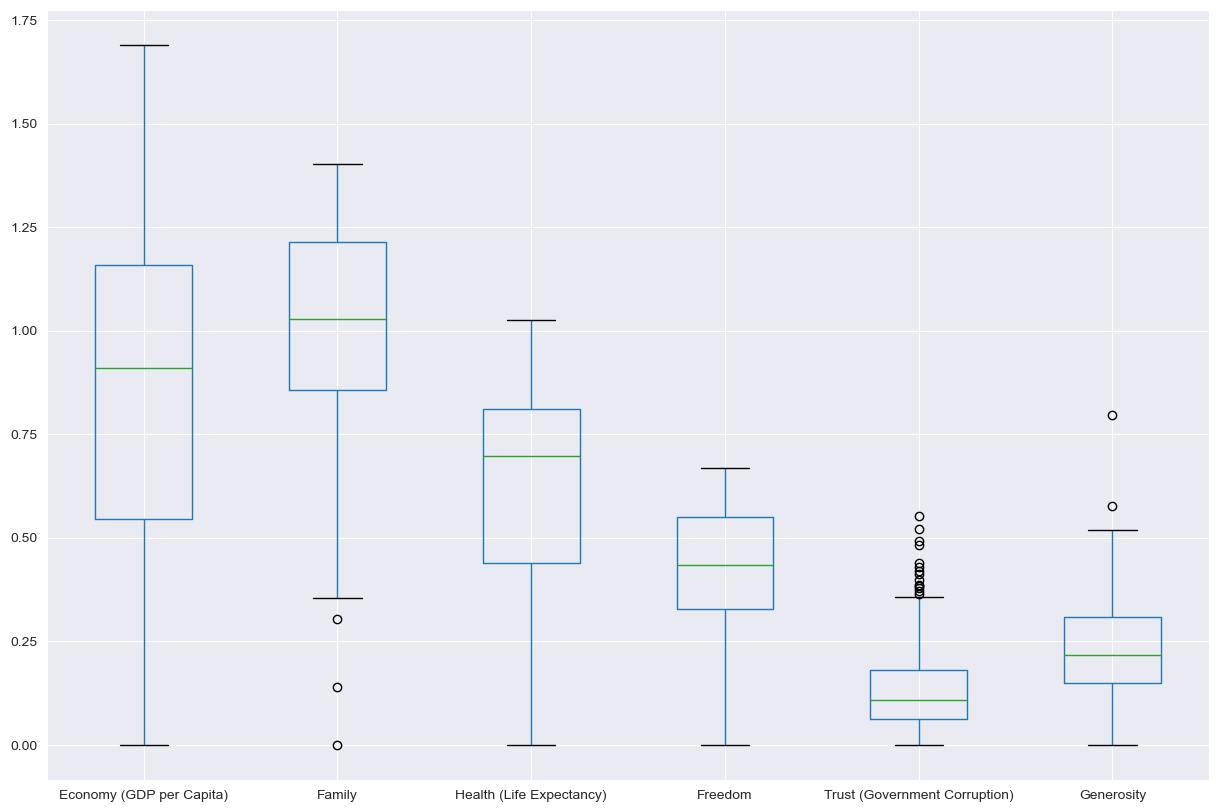

In [675]:
whr_sub_data_2015_selected = whr_sub_data_2015.loc[:, ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity']]
whr_sub_data_2015_selected.boxplot(figsize=(15,10))

Notiamo degli outliers sulla variabile "perceptions of corruptions".
Analizziamo questi outliers:

In [676]:
whr_sub_data_2015[whr_sub_data_2015['Trust (Government Corruption)'] > 0.30]

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
2,Denmark,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,Finland,6,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,Netherlands,7,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,Sweden,8,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,New Zealand,9,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,Australia,10,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
16,Luxembourg,17,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034


In [677]:
whr_sub_data_2015[whr_sub_data_2015['Country'] == 'Rwanda']

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
153,Rwanda,154,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628


Nell'esplorazione degli outliers, sono presenti dei dati anomali come il Rwanda, in cui presenta valori elevati per le variabili "Freedom" e "Trust (Government Corruption)".
Tuttavia, nonostante questi alti punteggi, il Rwanda è stato collocato tra le posizioni più basse nella classifica. Questo suggerisce che fattore "Trust (Government Corruption)" potrebbe influenzare la posizione del Rwanda nella classifica ed essere un pattern influente che rende un paese più o meno felice.

Dopo l'analisi degli outliers si analizzerà se questa tesi è fondata o meno.

Procediamo con l'analisi degli outliers della colonna "Family":

In [678]:
whr_sub_data_2015[whr_sub_data_2015['Family'] < 0.35]

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
147,Central African Republic,148,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835
152,Afghanistan,153,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
157,Togo,158,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


gli outliers in questo caso sono 3, sono posizionati agli ultimi posti della classifica ed hanno dei valori molto bassi, tranne per il Central African Republic che non è stato registrato il valore. Sono eccezioni che non condizioneranno le successive fasi di analisi

Concludiamo con l'analisi degli outliers della colonna "Generosity":

In [679]:
whr_sub_data_2015[whr_sub_data_2015['Generosity'] > 0.52]

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
33,Thailand,34,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630
128,Myanmar,129,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588


I due outliers non influenzeranno le successive analisi, poiché sono in numero molto limitato rispetto ai valori a disposizione. Tuttavia, analizzando i valori del Myanmar, si osserva che ha il valore più alto nella variabile 'Generosity', un valore elevato nella variabile 'Trust (Government Corruption)', un valore medio per la variabile 'Freedom', quasi medio per la variabile 'Healthy life expectancy', al di sotto della mediana per le variabili 'Social support' e 'GDP per capita'. Questi potrebbero essere dei pattern che influenzano il livello di felicità di un paese

Per analizzare i fattori economico-sociali più rilevanti si considereranno due campione casuali:
   - uno tra le prime 30 posizioni
   - uno tra le ultime 30 posizioni


In [680]:
df_first_30 = whr_sub_data_2015.head(30)
random_country_first_30 = df_first_30.sample(n=13, random_state=42)
random_country_first_30 = random_country_first_30.sort_values('Happiness Rank')
random_country_first_30

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
4,Canada,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,Finland,6,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
8,New Zealand,9,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,Australia,10,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
12,Austria,13,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
15,Brazil,16,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574
16,Luxembourg,17,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034
17,Ireland,18,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901
23,Singapore,24,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105


In [681]:
df_last_30 = whr_sub_data_2015.tail(30)
random_country_last_30 = df_last_30.sample(n=13, random_state=42)
random_country_last_30 = random_country_last_30.sort_values('Happiness Rank')

random_country_last_30

,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
128,Myanmar,129,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588
132,Cameroon,133,0.42250,0.88767,0.23402,0.49309,0.05786,0.20618
133,Bulgaria,134,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921
136,Angola,137,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
137,Mali,138,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798
140,Uganda,141,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066
143,Niger,144,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387
144,Cambodia,145,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359
145,Tanzania,146,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377
151,Burkina Faso,152,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747


Analizzando i due campioni, si può notare un contrasto significativo nei valori delle variabili:
- "GDP per capita"
- "Social support"
- "Healthy life expectancy" (per la comprensione delle variabili: "Healthy life expectancy" è inclusa anche l' organizzazione sanitaria della nazione, quindi legata al PIL della nazione)

Come dimostrazione verranno calcolate le medie delle 3 variabili:

In [682]:
random_country_first_30["Economy (GDP per Capita)"].mean(), random_country_first_30['Family'].mean(), random_country_first_30['Health (Life Expectancy)'].mean()

(1.336056923076923, 1.2535215384615381, 0.8879069230769231)

In [683]:
random_country_last_30["Economy (GDP per Capita)"].mean(), random_country_last_30['Family'].mean(), random_country_last_30['Health (Life Expectancy)'].mean()

(0.3851307692307693, 0.7830530769230768, 0.38500692307692314)

Calcolate le medie si può notare come nel primo campione presenta valori molto alti in queste variabili, mentre il secondo campione ha valori bassi. Questa differenza evidenzia una disparità significativa tra i due gruppi e come queste variabili sono influenti quindi i paesi con un basso punteggio del PIL sono meno felici.


In [684]:
random_country_first_30['Trust (Government Corruption)'].mean(), random_country_first_30['Freedom'].mean(), random_country_first_30['Generosity'].mean()

(0.32992153846153843, 0.6041846153846154, 0.31688)

In [685]:
random_country_last_30['Trust (Government Corruption)'].mean(), random_country_last_30['Freedom'].mean(), random_country_last_30['Generosity'].mean()

(0.10198846153846154, 0.3508753846153846, 0.3012469230769231)

Per queste 3 variabili non c'è un netto contrasto quindi potrebbero essere poco influenti.
Quindi tutte le variabili descrivono dei fattori sociali-economici per la felicità ma i più influenti potrebbero essere:
- "GDP per capita"
- "Social support"
- "Healthy life expectancy"

nella fase di data visualization verrà dimostrata.

Si analizza come i fattori più influenti sono distribuiti tra i vari continenti. si considera il dataset whr_sub_data_2015:

In [686]:
whr_sub_data_2015_region["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [687]:
whr_sub_data_2015_region_AFA = whr_sub_data_2015_region.loc[(whr_sub_data_2015_region["Region"] == "Sub-Saharan Africa") |(whr_sub_data_2015_region["Region"] == "Middle East and Northern Africa")]
whr_sub_data_2015_region_EU = whr_sub_data_2015_region.loc[(whr_sub_data_2015_region["Region"] == "Central and Eastern Europe") |(whr_sub_data_2015_region["Region"] == "Western Europe")]
whr_sub_data_2015_region_LAC = whr_sub_data_2015_region.loc[whr_sub_data_2015_region["Region"] == "Latin America and Caribbean"]
whr_sub_data_2015_region_AS = whr_sub_data_2015_region.loc[(whr_sub_data_2015_region["Region"] == "Southeastern Asia") | (whr_sub_data_2015_region["Region"] == "Southern Asia") | (whr_sub_data_2015_region["Region"] == "Eastern Asia")]
whr_sub_data_2015_region_NA = whr_sub_data_2015_region.loc[whr_sub_data_2015_region["Region"] == "North America"]
whr_sub_data_2015_region_ANZ = whr_sub_data_2015_region.loc[whr_sub_data_2015_region["Region"] == "Australia and New Zealand"]

tot_data = len(whr_sub_data_2015_region)

dict_continent = {"afa": whr_sub_data_2015_region_AFA, "eu": whr_sub_data_2015_region_EU, "lac": whr_sub_data_2015_region_LAC, "as": whr_sub_data_2015_region_AS, "na": whr_sub_data_2015_region_NA, "anz": whr_sub_data_2015_region_ANZ}

def calculate_fraction(numerator,denominator):
    return numerator / denominator

def calculate_percent(number, tot_num):
    percent = number / tot_num * 100
    int_percent = int(percent)
    dec_percent = percent - int_percent
    if dec_percent < 0.5:
        return math.floor(percent)
    else :
        return math.ceil(percent)

def print_percent(dict_cont, total_num):
    percent_afa = calculate_percent(len(dict_cont["afa"]),total_num)
    percent_eu =  calculate_percent(len(dict_cont["eu"]), total_num)
    percent_as = calculate_percent(len(dict_cont["as"]), total_num)
    percent_na = calculate_percent(len(dict_cont["na"]), total_num)
    percent_anz = calculate_percent(len(dict_cont["anz"]), total_num)
    percent_lac = calculate_percent(len(dict_cont["lac"]), total_num)


    print("Numero totale di dati: {tot_data}!".format(tot_data=total_num))
    print("Percentuale Africa: {percent_afa}%".format(percent_afa=percent_afa))
    print("Percentuale Europa: {percent_eu}%".format(percent_eu=percent_eu))
    print("Percentuale Asia: {percent_as}%".format(percent_as=percent_as))
    print("Percentuale Nord America: {percent_na}%".format(percent_na=percent_na))
    print("Percentuale Australia e Nuova Zelanda: {percent_anz}%".format(percent_anz=percent_anz))
    print("Percentuale Sud America e Caraibi: {percent_lac}%".format(percent_lac=percent_lac))

print_percent(dict_cont=dict_continent, total_num=tot_data)

Numero totale di dati: 158!
Percentuale Africa: 38%
Percentuale Europa: 32%
Percentuale Asia: 14%
Percentuale Nord America: 1%
Percentuale Australia e Nuova Zelanda: 1%
Percentuale Sud America e Caraibi: 14%


Da questa suddivisione, si può notare come l'Africa abbia il maggior numero di nazioni in questo dataset, seguita dall'Europa. L'Asia e il Sud America e i Caraibi hanno il 14%, mentre Nord America, Australia e Nuova Zelanda hanno una quota inferiore.

Si fanno le medie dei fattori più influenti:
- "GDP per capita"
- "Social support"
- "Healthy life expectancy"

In [688]:
def create_df_mean_continent(df_mean, first_name_col, second_name_col, third_name_col):
    mean_first_col = df_mean[first_name_col].mean()
    mean_second_col = df_mean[second_name_col].mean()
    mean_third_col = df_mean[third_name_col].mean()

    return pd.DataFrame(
        {"Mean "+first_name_col: mean_first_col,
         "Mean "+second_name_col: mean_second_col,
         "Mean "+third_name_col: mean_third_col}, index=[0])




In [689]:
whr_sub_data_2015_region_EU_mean = create_df_mean_continent(whr_sub_data_2015_region_EU, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_EU_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,1.092024,1.134631,0.798731


In [690]:
whr_sub_data_2015_region_ANZ_mean = create_df_mean_continent(whr_sub_data_2015_region_ANZ, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_ANZ_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,1.29188,1.31445,0.919965


In [691]:
whr_sub_data_2015_region_NA_mean = create_df_mean_continent(whr_sub_data_2015_region_NA, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_NA_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,1.3604,1.28486,0.88371


In [692]:
whr_sub_data_2015_region_LAC_mean = create_df_mean_continent(whr_sub_data_2015_region_LAC, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_LAC_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,0.876815,1.10472,0.70387


In [693]:
whr_sub_data_2015_region_AFA_mean = create_df_mean_continent(whr_sub_data_2015_region_AFA, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_AFA_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,0.609307,0.84622,0.423426


In [694]:
whr_sub_data_2015_region_AS_mean = create_df_mean_continent(whr_sub_data_2015_region_AS, "Economy (GDP per Capita)","Family", "Health (Life Expectancy)")

whr_sub_data_2015_region_AS_mean

,Mean Economy (GDP per Capita),Mean Family,Mean Health (Life Expectancy)
0,0.815253,0.88991,0.68847


Analizzando le varie medie dei continenti, sul PIL spicca il continente nord americano con il punteggio più alto. Il continente africano è fanalino di coda con un punteggio di 0.60. Sul supporto sociale, l'Australia e la Nuova Zelanda hanno il punteggio più alto. Il continente africano è fanalino di coda con un punteggio di 0.84. Infine, per il punteggio sulla salute, la Nuova Zelanda e l'Australia hanno il punteggio più alto. Anche su questa variabile, il continente africano è fanalino di coda con un punteggio di 0.42. Possiamo concludere che le nazioni che sono meno felici sono presenti nel continente africano, mentre le nazioni più felici sono presenti nei continenti nord americani e in Nuova Zelanda e Australia. Le varie differenze saranno più chiare nella fase di data visualization.

Con il raggruppamento dei dati in continenti, l'analisi potrebbe essere compromessa. Ad esempio, nel caso dell'Oceania, sono presenti solo Australia e Nuova Zelanda. Avendo una media maggiore rispetto all'Unione Europea o ad altri continenti, può sembrare che quel continente sia più felice. Continueremo l'analisi e approfondiremo nella seconda analisi con il dataset Human Freedom Index sulle libertà economiche e sociali.

## DATA TRANSFORMATION

 verranno apportate delle modifiche ai vari dataset per poter fare delle analisi approfonditi nella prossima fase del data visualization

viene aggiunto una colonna per ogni dataset per poter utilizzare il grafico a linea

In [695]:
whr_sub_data_2015['Year'] = 2015
whr_sub_data_2016['Year'] = 2016
whr_sub_data_2017['Year'] = 2017
whr_sub_data_2018['Year'] = 2018
whr_sub_data_2019['Year'] = 2019

verranno modificate i nomi delle colonne dei dataset

In [696]:
whr_sub_data_2018 = whr_sub_data_2018.rename(columns= {"Country or region": "Country", 'Freedom to make life choices': 'Freedom'})
whr_sub_data_2019 = whr_sub_data_2019.rename(columns= {"Country or region": "Country", 'Freedom to make life choices': 'Freedom'})
whr_sub_data_2015 = whr_sub_data_2015.rename(columns= {"Happiness Rank": "Overall rank", "Economy (GDP per Capita)": "GDP per capita", 'Family': 'Social support', 'Health (Life Expectancy)': "Healthy life expectancy", 'Trust (Government Corruption)': 'Perceptions of corruption'})
whr_sub_data_2016 = whr_sub_data_2016.rename(columns= {"Happiness Rank": "Overall rank", 'Economy (GDP per Capita)': "GDP per capita", 'Family': 'Social support', 'Health (Life Expectancy)': "Healthy life expectancy", 'Trust (Government Corruption)': 'Perceptions of corruption'})
whr_sub_data_2017 = whr_sub_data_2017.rename(columns= {"Happiness.Rank": "Overall rank", 'Economy..GDP.per.Capita.': "GDP per capita", 'Family': 'Social support', "Health..Life.Expectancy.": "Healthy life expectancy",'Trust..Government.Corruption.': 'Perceptions of corruption' })

verranno riordinate le colonne dei dataset degli anni 2015,2016 e 2017

In [697]:
new_order_column = ['Overall rank', 'Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption', 'Year']

whr_sub_data_2017_reorder_col = whr_sub_data_2017.loc[:, new_order_column]
whr_sub_data_2016_reorder_col = whr_sub_data_2016.loc[:, new_order_column]
whr_sub_data_2015_reorder_col = whr_sub_data_2015.loc[:, new_order_column]


verranno uniti i vari dataset (whr_sub_data_2015_reorder_col,whr_sub_data_2016_reorder_col,whr_sub_data_2017_reorder_col,whr_data_2018,whr_data_2019)

In [698]:
aggregated_data = pd.concat([whr_sub_data_2015_reorder_col,whr_sub_data_2016_reorder_col,whr_sub_data_2017_reorder_col,whr_sub_data_2018, whr_sub_data_2019], ignore_index=True)

aggregated_data

,Overall rank,Country,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,1,Switzerland,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...
777,152,Rwanda,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
778,153,Tanzania,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
779,154,Afghanistan,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
780,155,Central African Republic,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


Infine si calcola la correlazione tra i vari punteggi:

In [699]:
whr_data_2015_selected_column = whr_sub_data_2015.loc[:, ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Perceptions of corruption','Generosity']]
corr = whr_data_2015_selected_column.corr()

## DATA VISUALIZATION

In questa fase, verrà ulteriormente dimostrato come le variabili "GDP per capita", "Social Support", "Healthy life expectancy" possono essere un pattern per capire la felicità dei paesi:

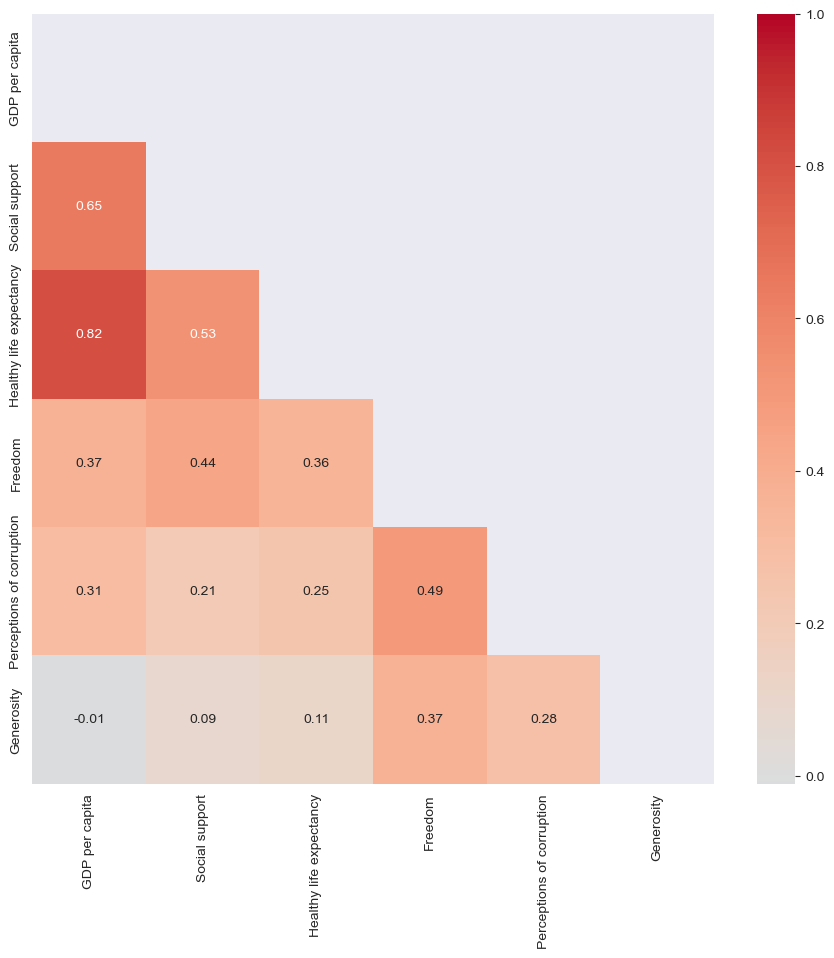

In [700]:
def draw_graph_corr(correlation):
    plt.figure(figsize=(11, 10))

    cmap=sns.color_palette("coolwarm", as_cmap=True)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, vmax=1, center=0, cmap=cmap, annot=True, fmt='.2f')
    plt.show()


draw_graph_corr(corr)

Verrano considerate correlazioni forti o mediamente forti con valori superiori a 0.6. Provando a fare un po' di chiarezza, ricavo i seguenti spunti:
 - Un coefficiente di correlazione di 0.85 tra "GDP per capita" e "Healthy Life Expectancy" indica una forte correlazione positiva, suggerendo che paesi con un PIL più alto tendono ad avere un'aspettativa di vita più elevata. Allo stesso modo, un coefficiente di correlazione di 0.65 tra "PIL" e "Social Support" indica una correlazione positiva, indicando che paesi con un PIL più alto tendono ad avere un maggiore supporto sociale. le variabili "GDP per capita", "Social Support", "Healthy life expectancy" sono correlati come pattern che influenzano maggiormente la felicità dei paesi.

Un'altra dimostrazione grafica con il grafico a dispersione:

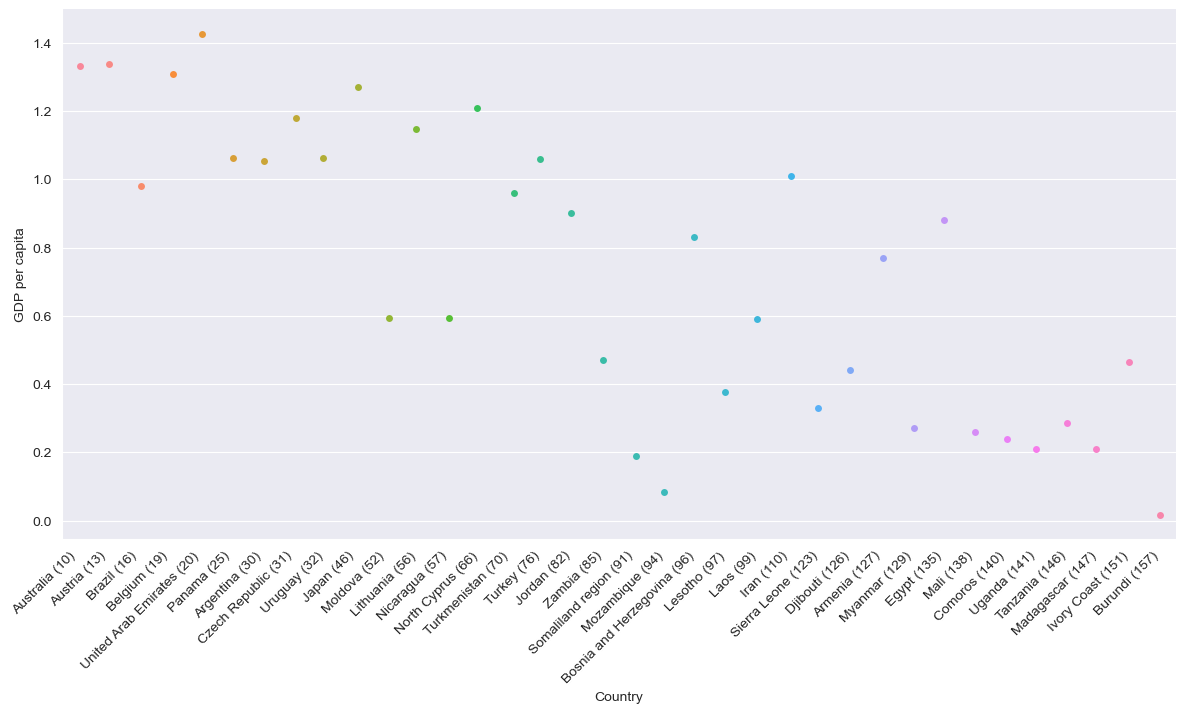

In [701]:
def format_label(x):
    return f"{x['Country']} ({x['Overall rank']})"

def plot_scatter(y_data, df_random):
    scatter_plot = sns.catplot(data=df_random,  x='Country', y=y_data, kind='strip',height=6, aspect=2)
    scatter_plot.set_xticklabels([format_label(x) for _, x in df_random.iterrows()], rotation=45, ha='right')

    plt.show()

random_country = whr_sub_data_2015.sample(n=36, random_state=42)
random_country = random_country.sort_values('Overall rank')
plot_scatter('GDP per capita', random_country)


È stato preso un campione perché le etichette dello scatterplot non erano ben visibili. Dall'osservazione dello scatterplot, emerge un'associazione lineare negativa tra le variabili, con una forza moderata. Inoltre, sembra confermare l'analisi condotta nella fase di data exploration, secondo cui un PIL più elevato è correlato a maggiori livelli di felicità.

Si dimostra con il "Social Support":

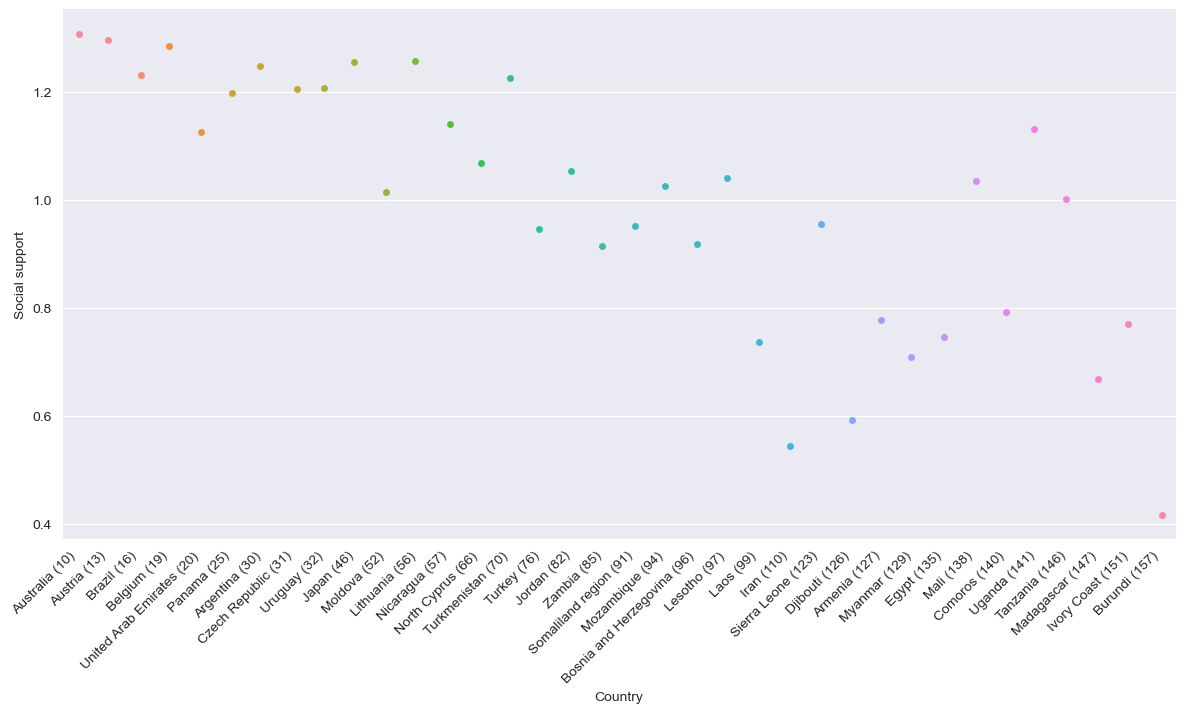

In [702]:
plot_scatter('Social support', random_country)

Anche con questo fattore, si ottiene uno stessa tendenza del PIL

Si passa alla dimostrazione grafica del fattore "Healthy life expectancy":

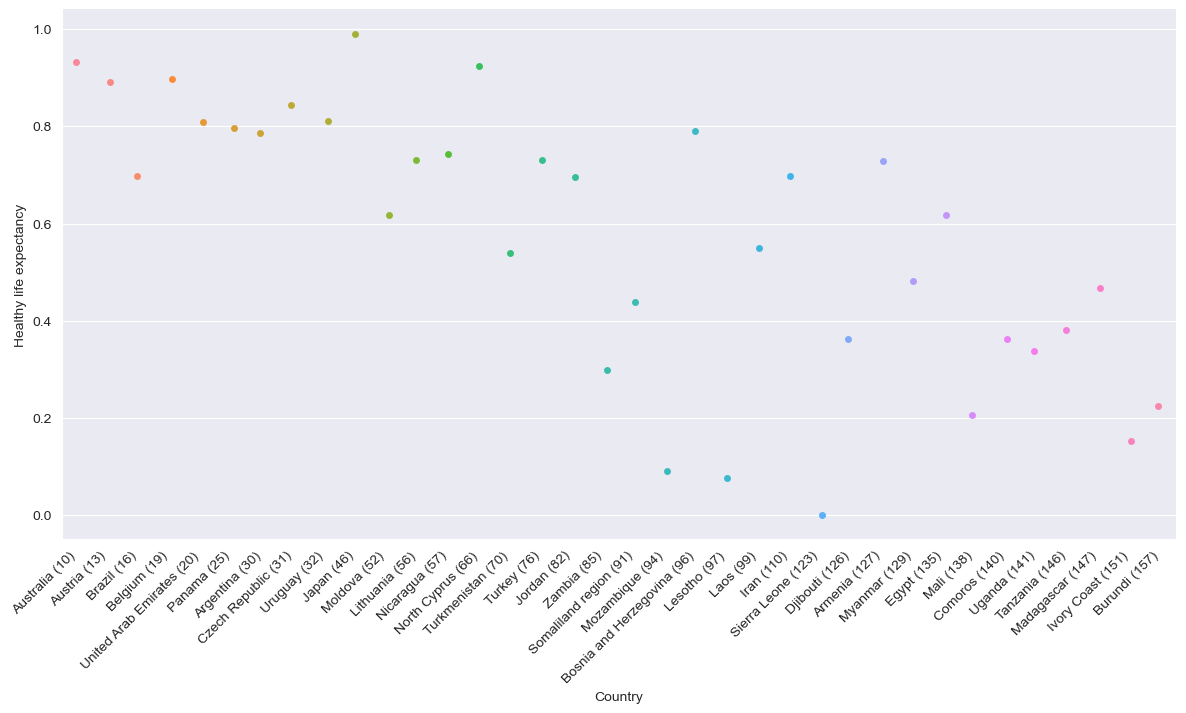

In [703]:
plot_scatter('Healthy life expectancy', random_country)

anche questo fattore ha una tendenza simile al "PIL" e "Social support"

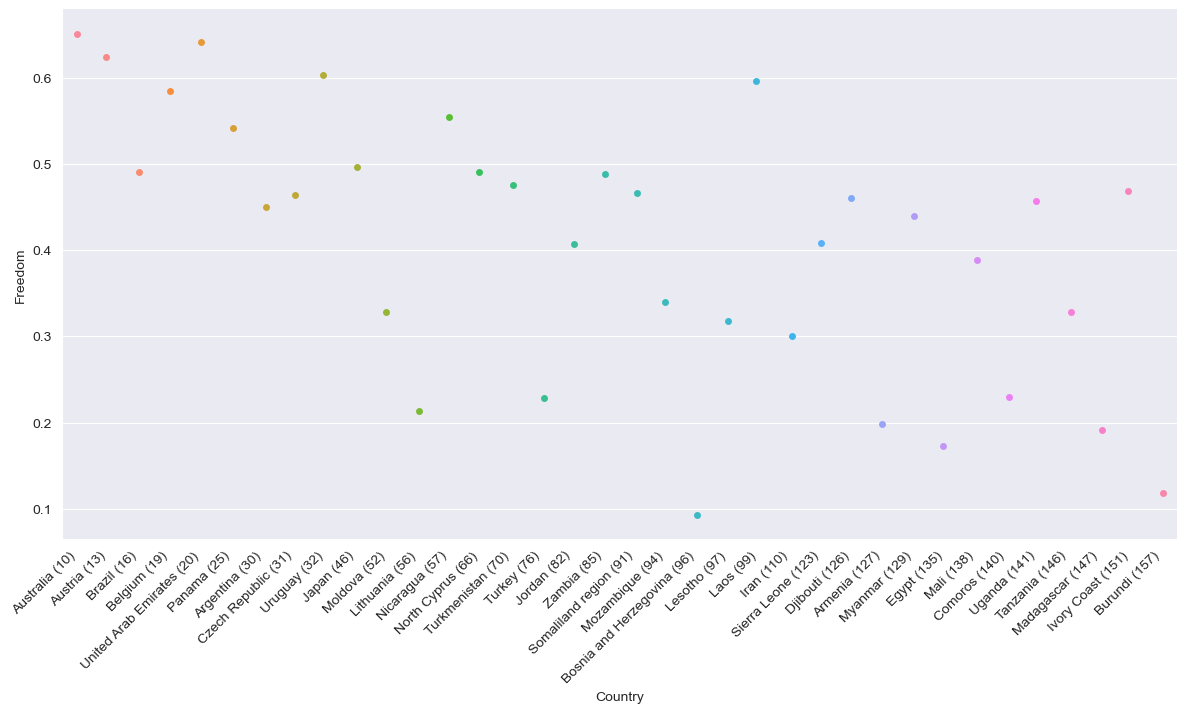

In [704]:
plot_scatter('Freedom', random_country)

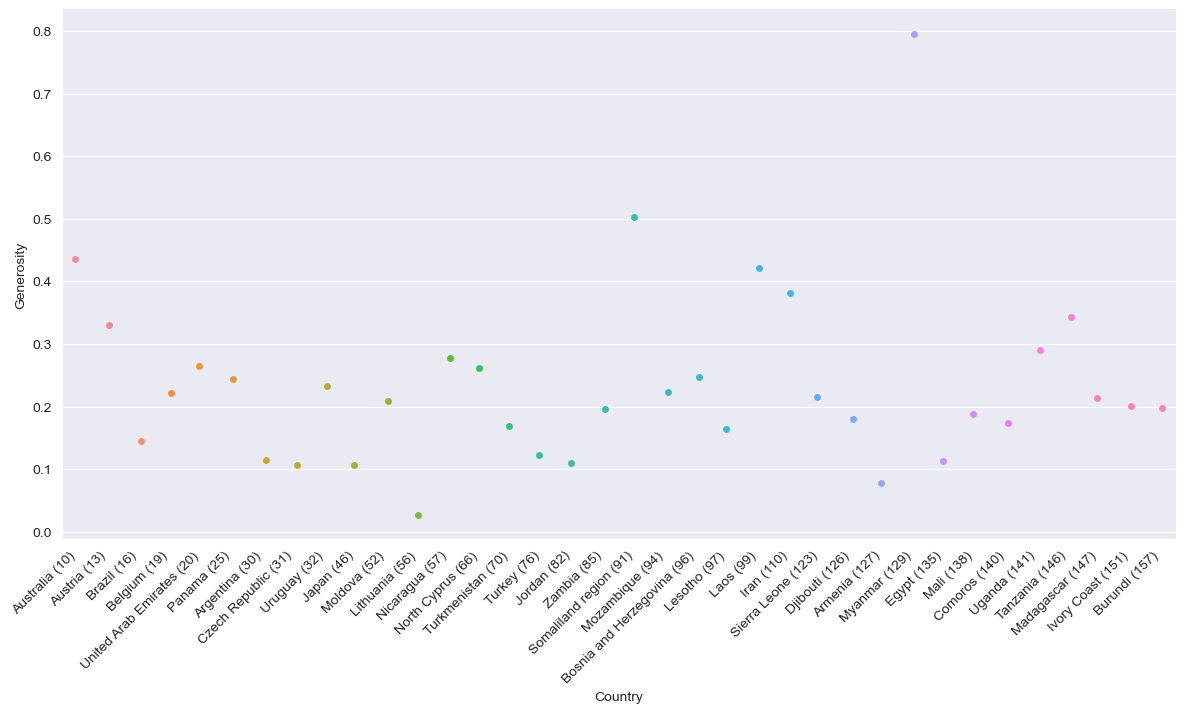

In [705]:
plot_scatter('Generosity', random_country)

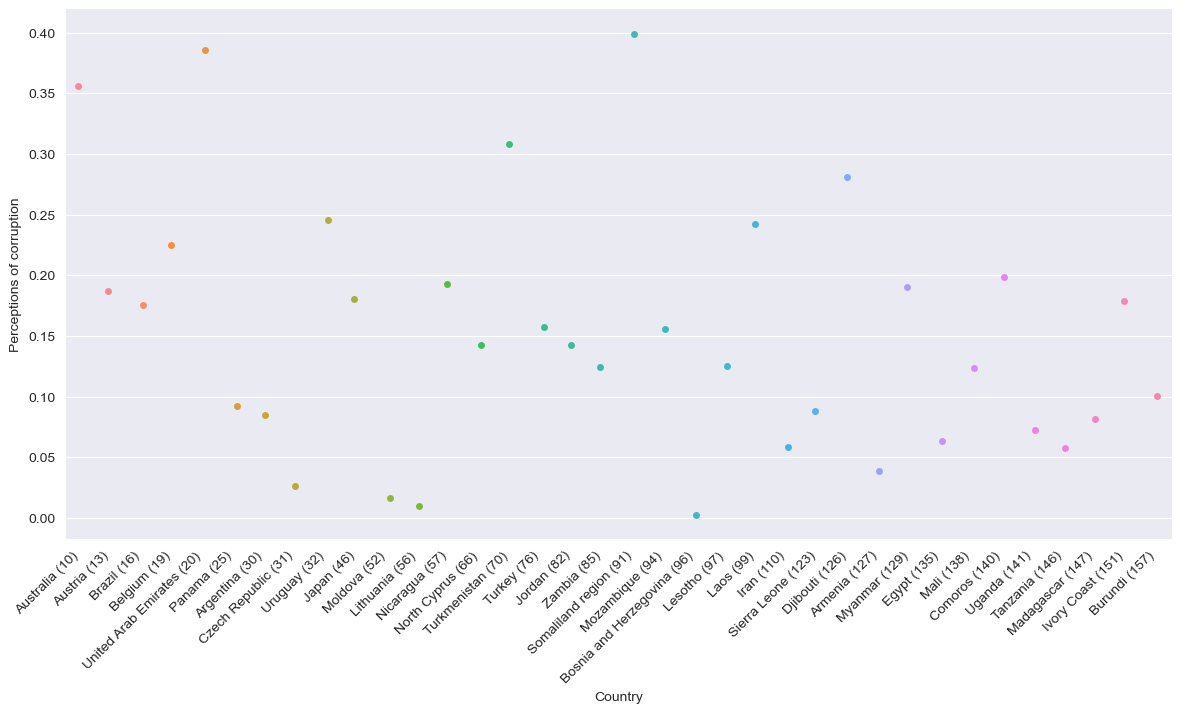

In [706]:
plot_scatter('Perceptions of corruption', random_country)

In questi ultimi casi è emerso che c'è un assenza di correlazione, dimostrando che il fattore "generosity" e "Perceptions of corruption" non rientra nei fattori più rilevanti per la felicità di una nazione

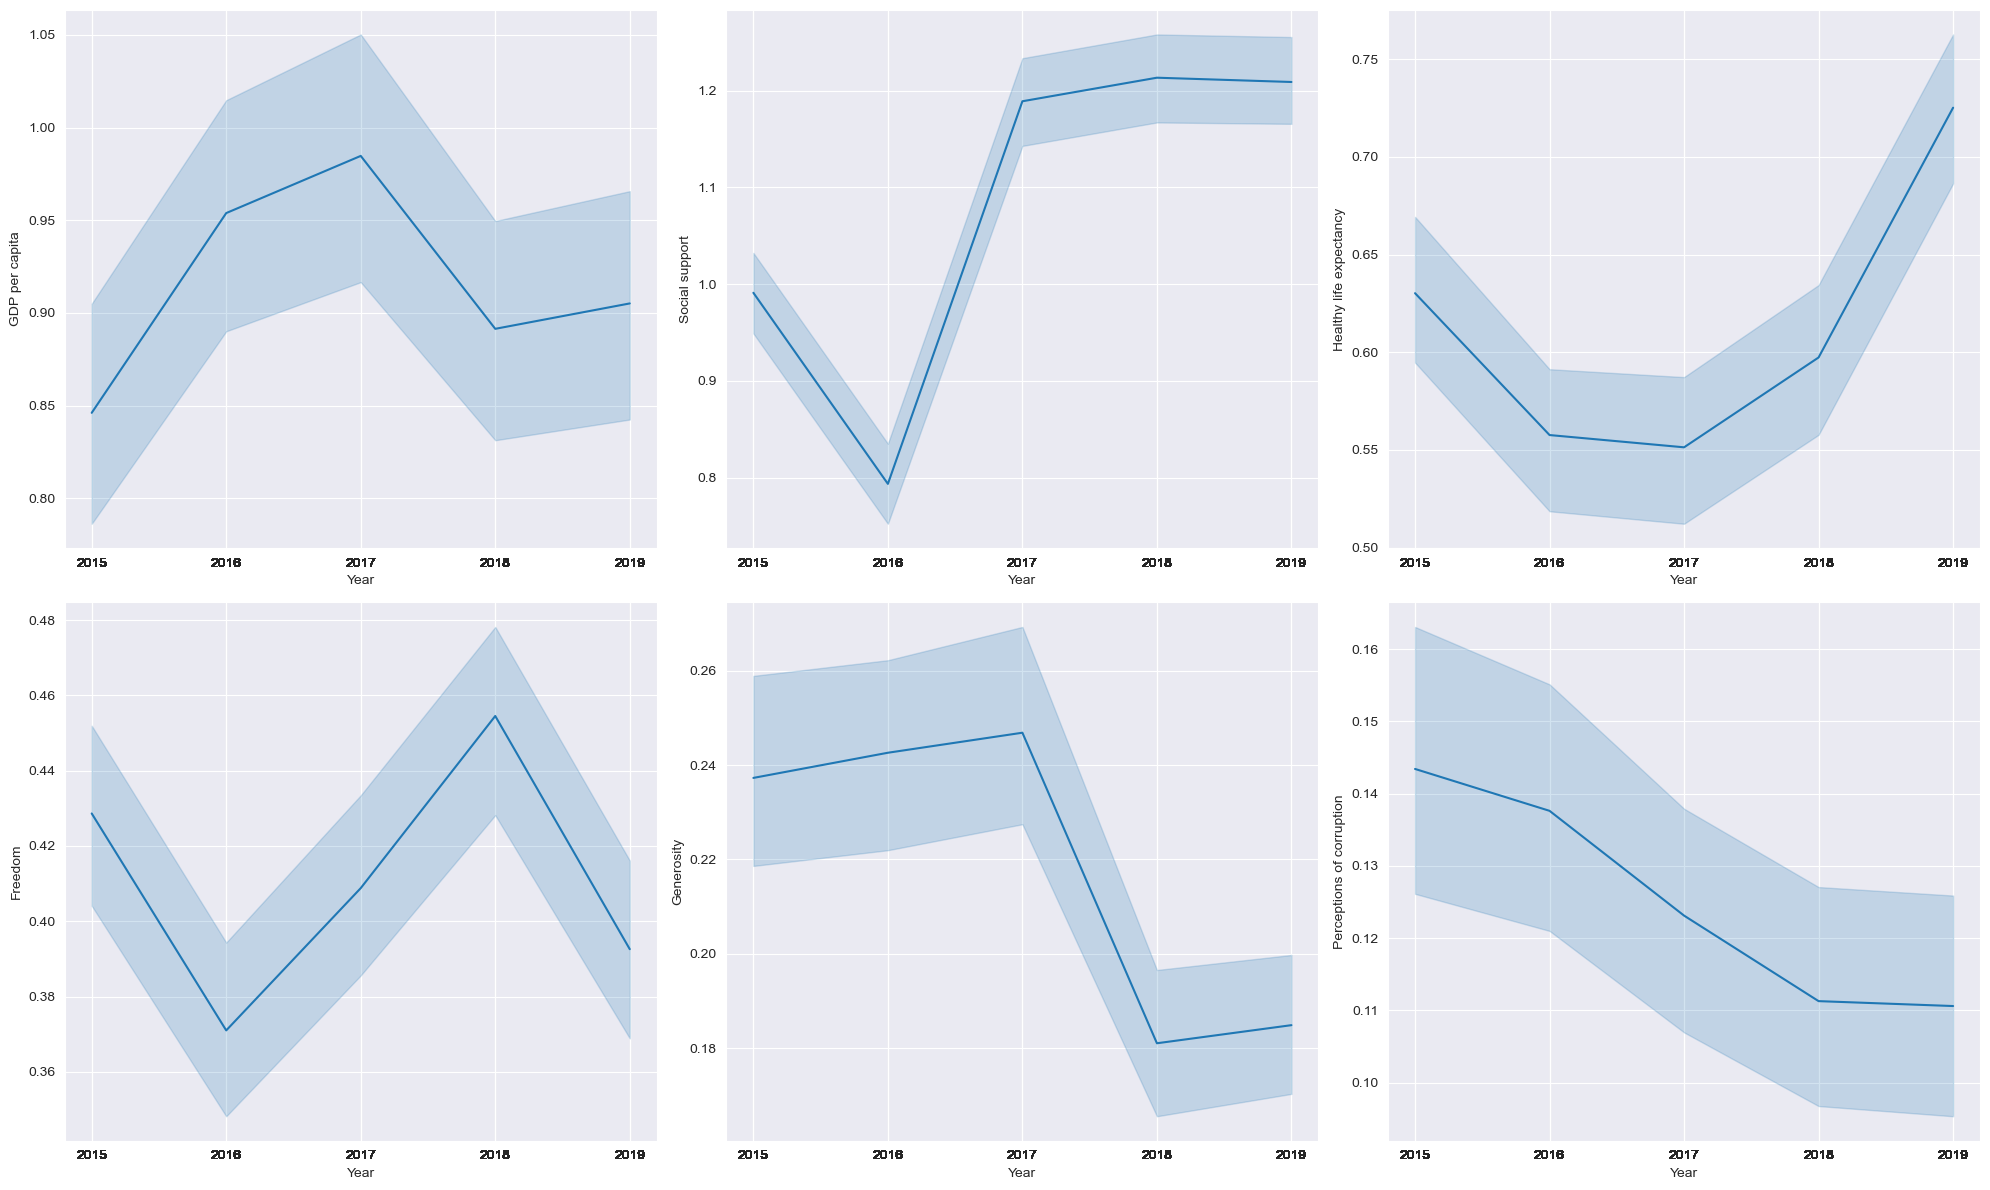

In [707]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

sns.lineplot(x='Year', y='GDP per capita', data=aggregated_data, ax=axes[0,0])
sns.lineplot(x='Year', y='Social support', data=aggregated_data, ax=axes[0,1])
sns.lineplot(x='Year', y='Healthy life expectancy', data=aggregated_data, ax=axes[0,2])
sns.lineplot(x='Year', y='Freedom', data=aggregated_data, ax=axes[1,0])
sns.lineplot(x='Year', y='Generosity', data=aggregated_data, ax=axes[1,1])
sns.lineplot(x='Year', y='Perceptions of corruption', data=aggregated_data, ax=axes[1,2])

plt.xticks(aggregated_data['Year'])

axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('GDP per capita')
axes[0,0].set_xticks(aggregated_data['Year'])

axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Social support')
axes[0,1].set_xticks(aggregated_data['Year'])

axes[0,2].set_xlabel('Year')
axes[0,2].set_ylabel('Healthy life expectancy')
axes[0,2].set_xticks(aggregated_data['Year'])

axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Freedom')
axes[1,0].set_xticks(aggregated_data['Year'])

axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Generosity')
axes[1,1].set_xticks(aggregated_data['Year'])

axes[1,2].set_xlabel('Year')
axes[1,2].set_ylabel('Perceptions of corruption')
axes[1,2].set_xticks(aggregated_data['Year'])

plt.tight_layout()

plt.show()

Analizzando i vari fattori socio-economici, è possibile trarre le seguenti riflessioni dal campione intervistato:
* È emersa una crescente fiducia nello stato, con una diminuzione di circa 0,02 punti nella percezione della corruzione.
* Nel corso degli anni si è osservato un aumento dell'egoismo, con una diminuzione di 0,06 punti a partire dal 2017, seguita da un lieve aumento nel 2019.
* La soddisfazione riguardo alla libertà di scelta nella propria vita è risultata bassa, raggiungendo il punto più basso nel 2016, poi risalendo e raggiungendo un picco positivo nel 2018, per poi calare di circa 0,08 punti nel 2019.
* Dopo un lieve calo tra il 2015 e la fine del 2017, si è verificata una crescita di circa 0,2 punti fino al 2019 nelle aspettative di vita media.
* Dopo un picco negativo nel 2016, il supporto sociale è aumentato di circa 0,4 punti nel 2017, rimanendo più o meno costante nei due anni successivi. Ciò indica che la popolazione può fare affidamento sui parenti o amici in caso di difficoltà.
* L'economia ha registrato una crescita di circa 0,10 punti dal 2015 al 2017, seguita da una diminuzione di circa 0,1 punti nel 2018. Tuttavia, si è verificato un piccolo aumento nel 2019 di circa 0,04 punti. Nel complesso, si osserva un andamento altalenante senza una netta tendenza positiva o negativa

Si dimostra con dei grafici come i fattori più influenti sono distribuiti tra i vari continenti:

<AxesSubplot:>

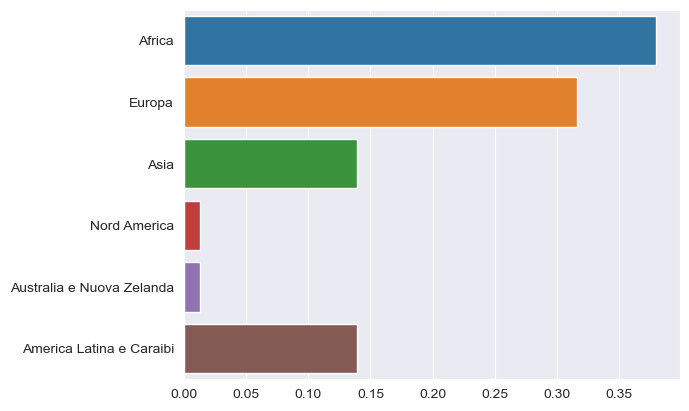

In [708]:
fraction_afa = calculate_fraction(len(whr_sub_data_2015_region_AFA),tot_data)
fraction_eu =  calculate_fraction(len(whr_sub_data_2015_region_EU), tot_data)
fraction_as = calculate_fraction(len(whr_sub_data_2015_region_AS), tot_data)
fraction_na = calculate_fraction(len(whr_sub_data_2015_region_NA), tot_data)
fraction_anz = calculate_fraction(len(whr_sub_data_2015_region_ANZ), tot_data)
fraction_lac = calculate_fraction(len(whr_sub_data_2015_region_LAC), tot_data)
data_decimal_score = [fraction_afa, fraction_eu, fraction_as, fraction_na, fraction_anz, fraction_lac]
names_score = ["Africa", "Europa", "Asia", "Nord America", "Australia e Nuova Zelanda", "America Latina e Caraibi"]

sns.barplot(x=data_decimal_score, y=names_score, orient="horizontal")


La suddivisione del dataset dell'anno 2015 con il continente africano che ha più dati, seguito da Europa, Asia, America Latina e Caraibi. Fanalino di coda il Nord America, Australia e Nuova Zelanda

Uno sguardo sulla distribuzione dei dati raggruppati per continenti

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>],
       [<AxesSubplot:title={'center':'Generosity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

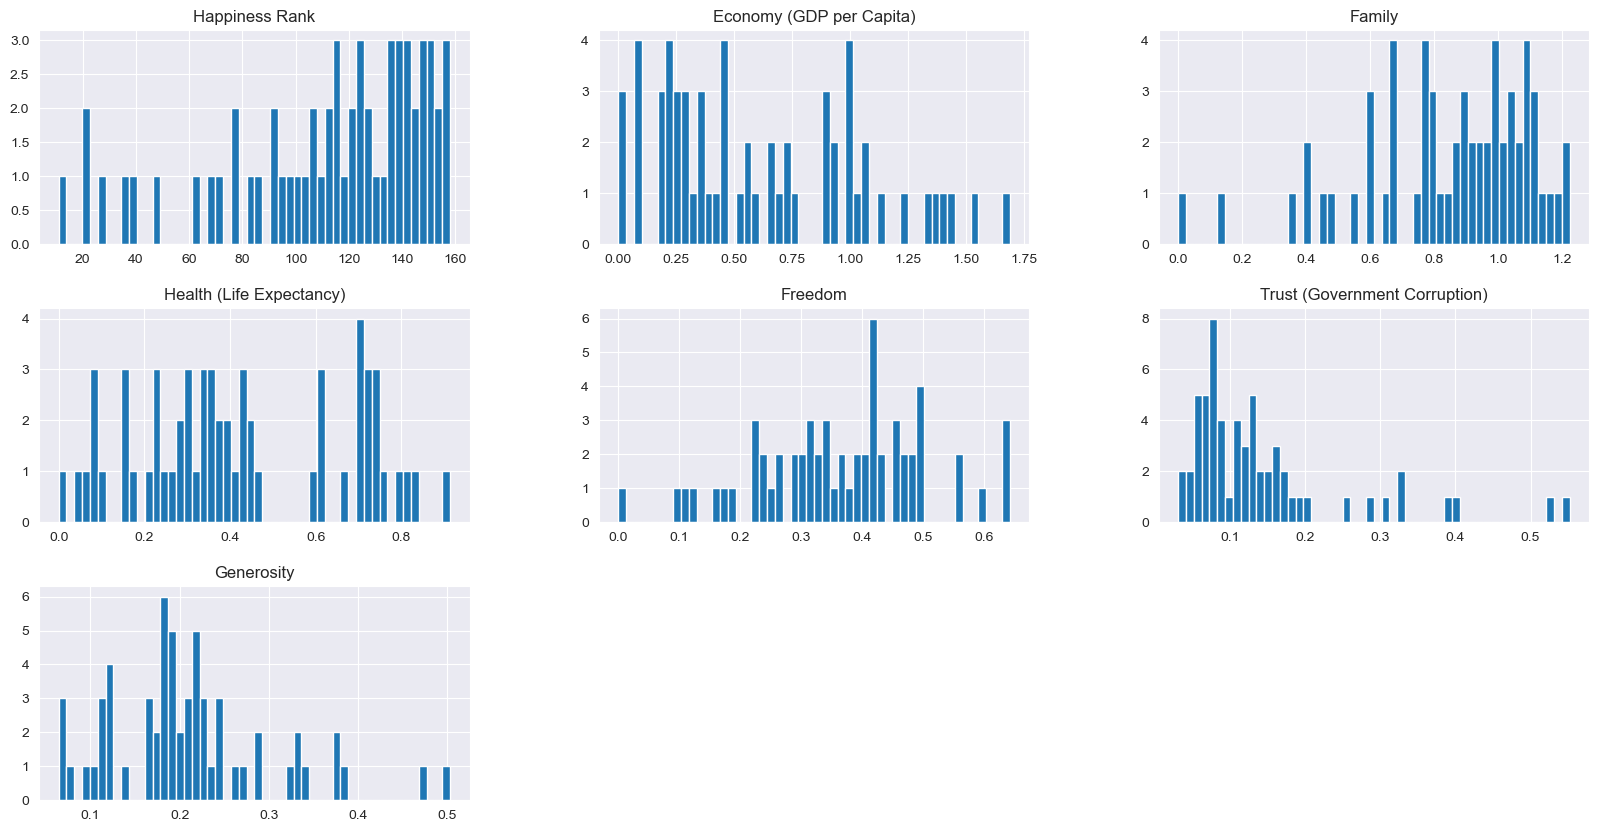

In [709]:
whr_sub_data_2015_region_AFA.hist(bins=50, figsize=(20,10))

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>],
       [<AxesSubplot:title={'center':'Generosity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

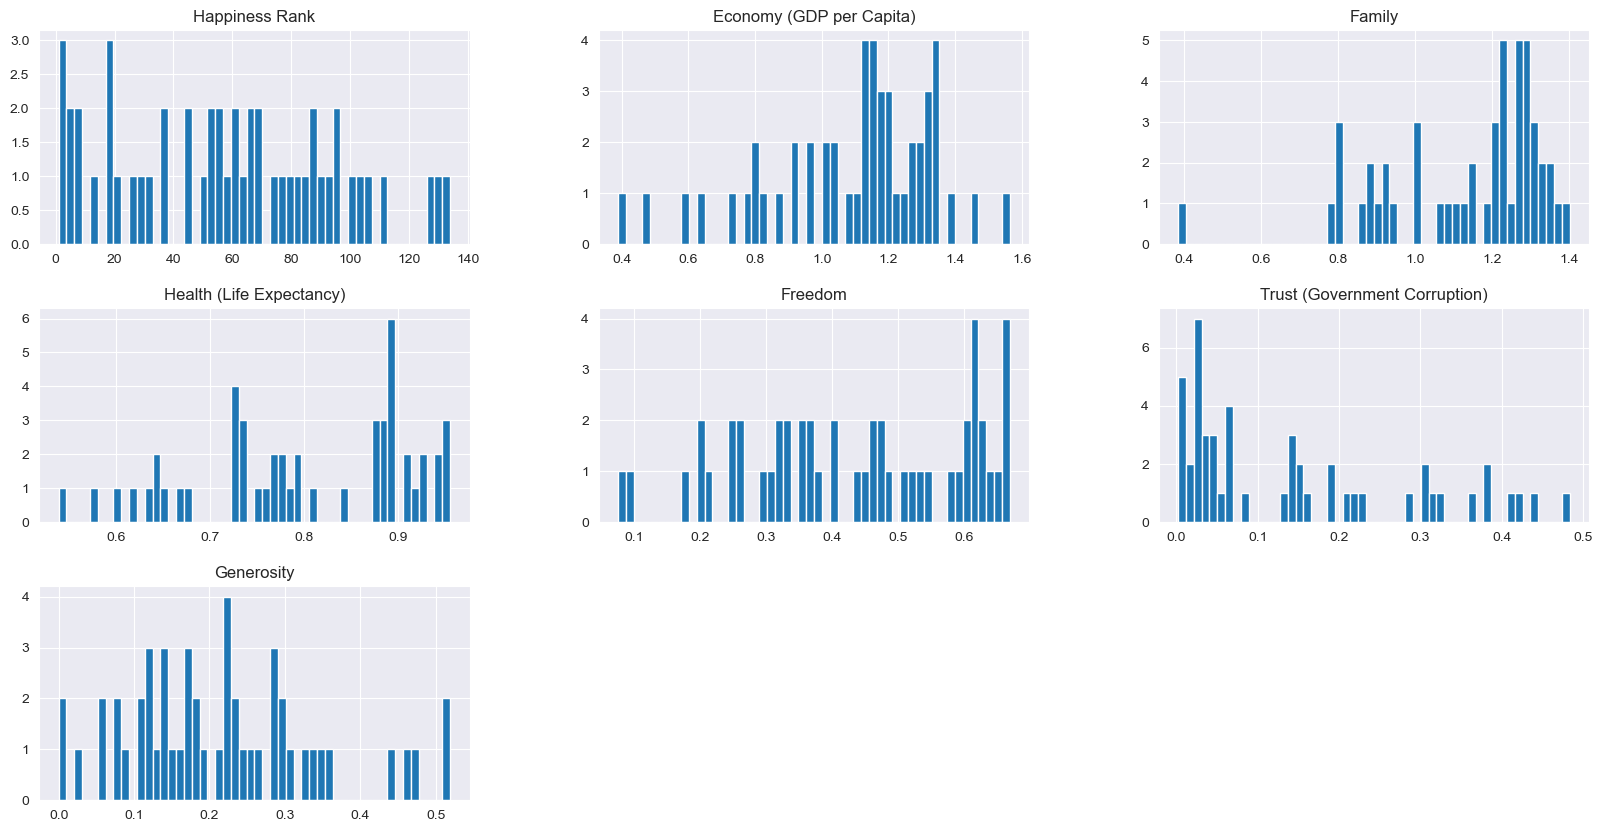

In [710]:
whr_sub_data_2015_region_EU.hist(bins=50, figsize=(20,10))

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>],
       [<AxesSubplot:title={'center':'Generosity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

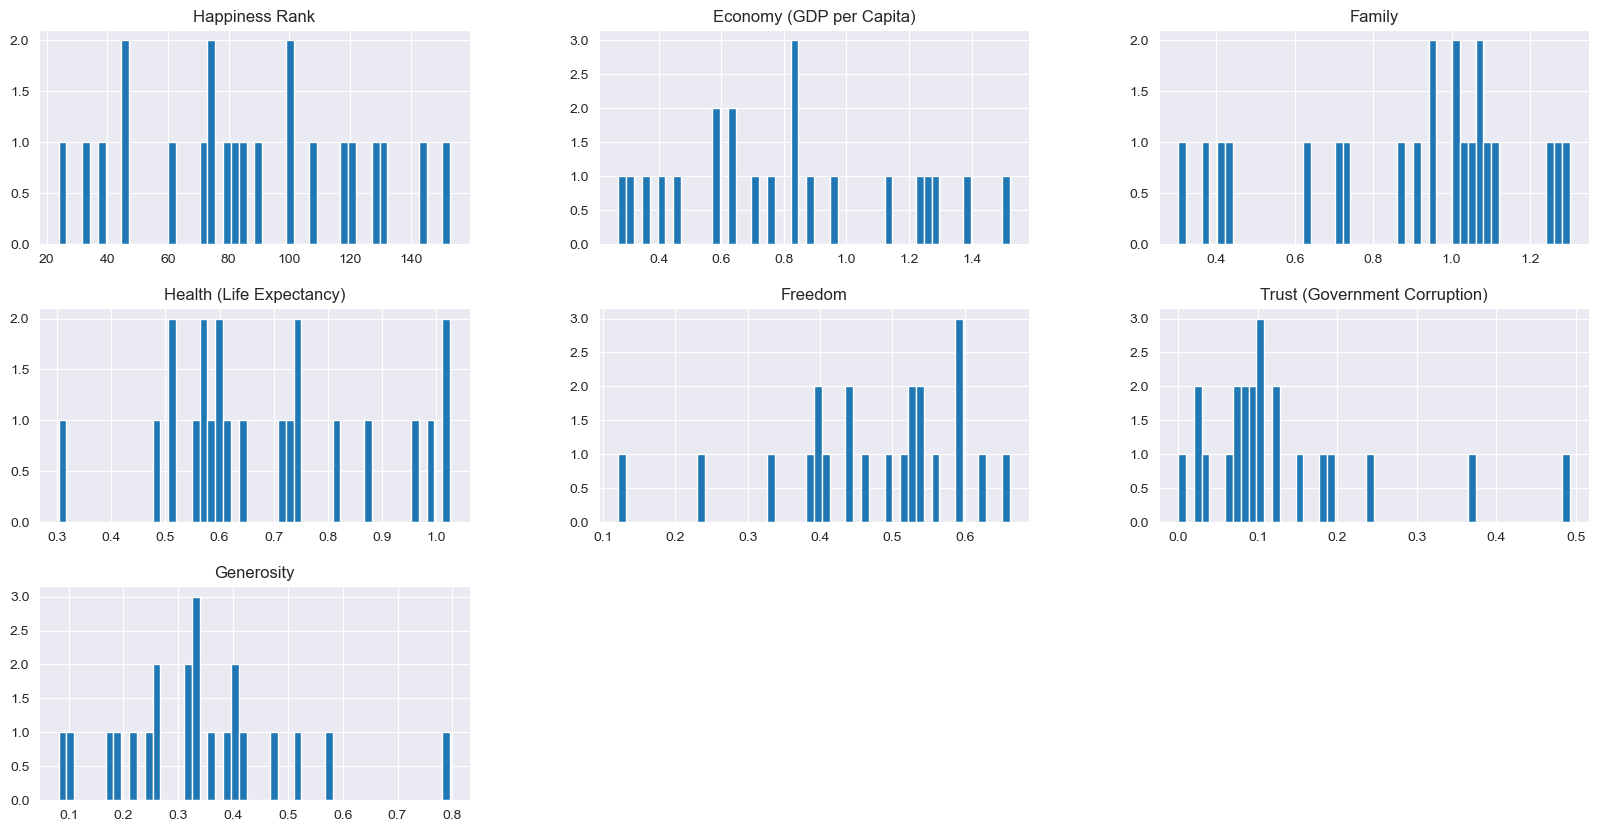

In [711]:
whr_sub_data_2015_region_AS.hist(bins=50, figsize=(20,10))

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>],
       [<AxesSubplot:title={'center':'Generosity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

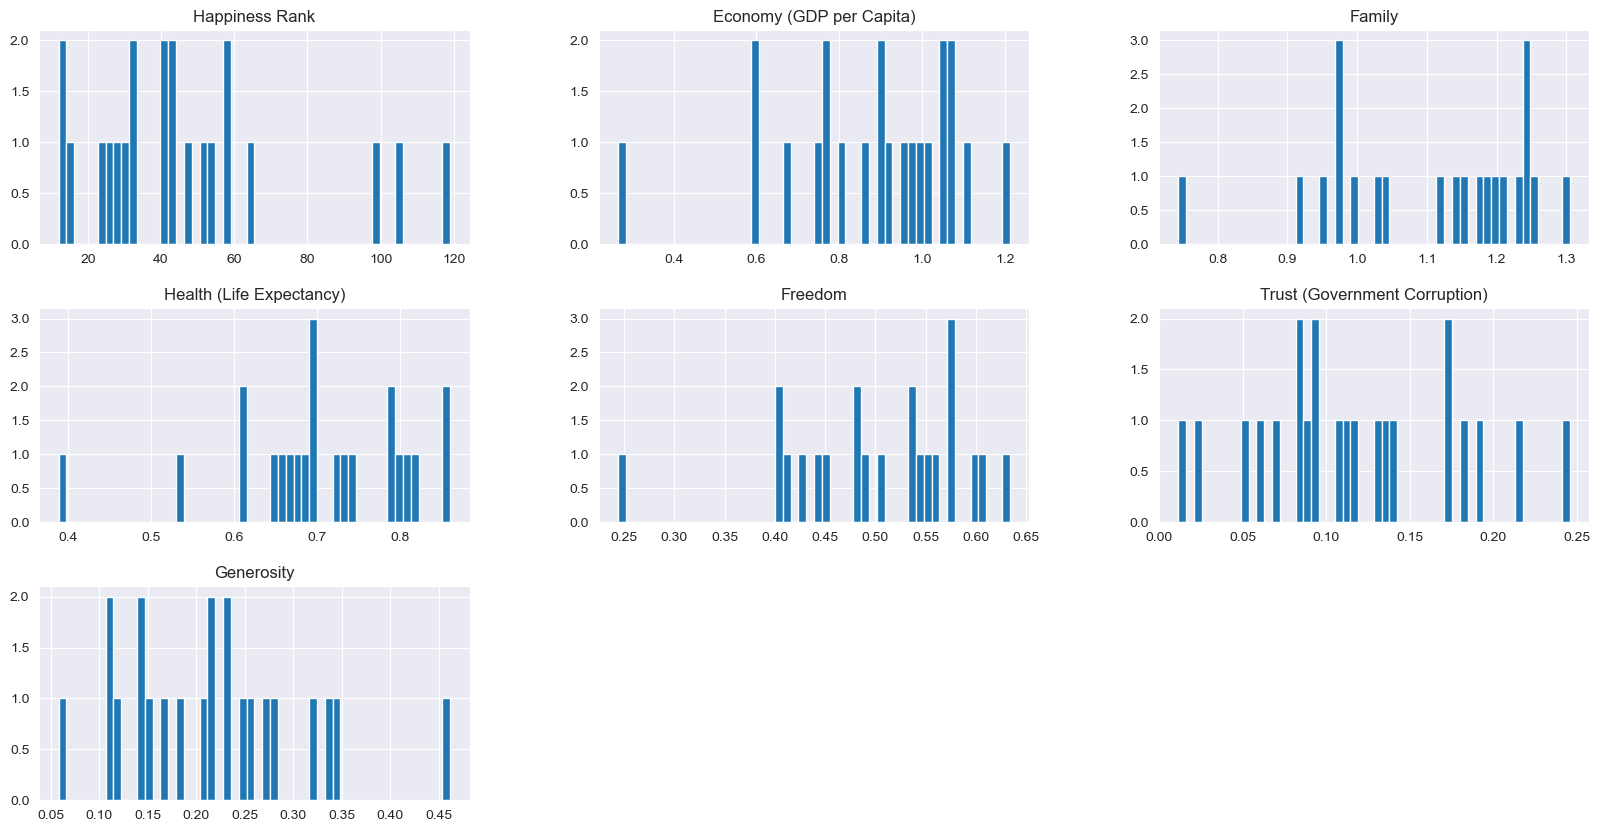

In [712]:
whr_sub_data_2015_region_LAC.hist(bins=50, figsize=(20,10))

In [713]:
names_score = ["Africa", "Europa", "Asia", "Nord America", "Australia e Nuova Zelanda", "America Latina e Caraibi"]
data_mean_GDP = [whr_sub_data_2015_region_AFA_mean.iloc[0,0],whr_sub_data_2015_region_EU_mean.iloc[0,0], whr_sub_data_2015_region_AS_mean.iloc[0,0], whr_sub_data_2015_region_NA_mean.iloc[0,0],whr_sub_data_2015_region_ANZ_mean.iloc[0,0], whr_sub_data_2015_region_LAC_mean.iloc[0,0]
             ]

data_mean_social_sup = [whr_sub_data_2015_region_AFA_mean.iloc[0,1],whr_sub_data_2015_region_EU_mean.iloc[0,1], whr_sub_data_2015_region_AS_mean.iloc[0,1], whr_sub_data_2015_region_NA_mean.iloc[0,1],whr_sub_data_2015_region_ANZ_mean.iloc[0,1], whr_sub_data_2015_region_LAC_mean.iloc[0,1]
                 ]

data_mean_health = [whr_sub_data_2015_region_AFA_mean.iloc[0,2],whr_sub_data_2015_region_EU_mean.iloc[0,2], whr_sub_data_2015_region_AS_mean.iloc[0,2], whr_sub_data_2015_region_NA_mean.iloc[0,2],whr_sub_data_2015_region_ANZ_mean.iloc[0,2], whr_sub_data_2015_region_LAC_mean.iloc[0,2]
                 ]

Text(0, 0.5, 'Healthy life expectancy')

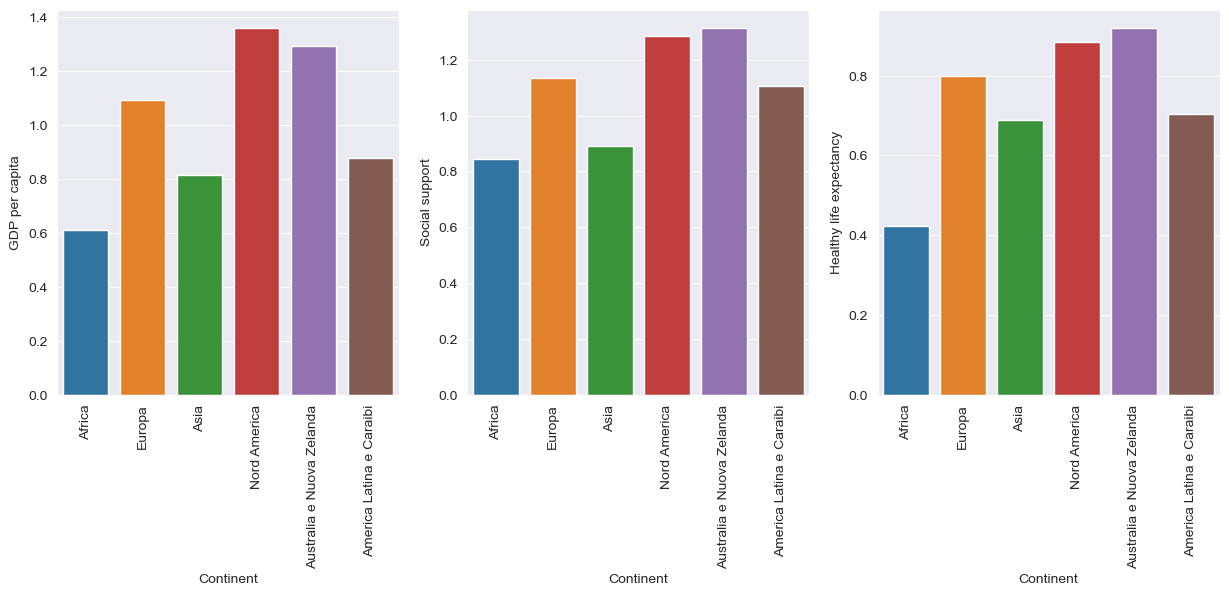

In [714]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bp_gdp = sns.barplot(ax=axes[0], x=names_score, y=data_mean_GDP)
bp_ss = sns.barplot(ax=axes[1], x=names_score, y=data_mean_social_sup)
bp_h = sns.barplot(ax=axes[2], x=names_score, y=data_mean_health)

bp_gdp.set_xticklabels(bp_gdp.get_xticklabels(), rotation=90)
bp_ss.set_xticklabels(bp_ss.get_xticklabels(), rotation=90)
bp_h.set_xticklabels(bp_h.get_xticklabels(), rotation=90)

bp_gdp.set_xlabel('Continent')
bp_gdp.set_ylabel('GDP per capita')

bp_ss.set_xlabel('Continent')
bp_ss.set_ylabel('Social support')

bp_h.set_xlabel('Continent')
bp_h.set_ylabel('Healthy life expectancy')


Come confermato dalla fase di data exploration, Nord America, Australia e Nuova Zelanda hanno i maggior punteggi per i 3 fattori rilevanti socio-economici. Il continente Africano ha il più basso punteggio per tutti i tre fattori rilevanti.


Un altro modo per dimostrare l'analisi precedente è tramite un heatmap del mappamondo, filtrando per il PIL di ogni nazione:

/var/folders/vy/gsnv_lqx3p3gytc39kn9307w0000gn/T/ipykernel_87098/804082673.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


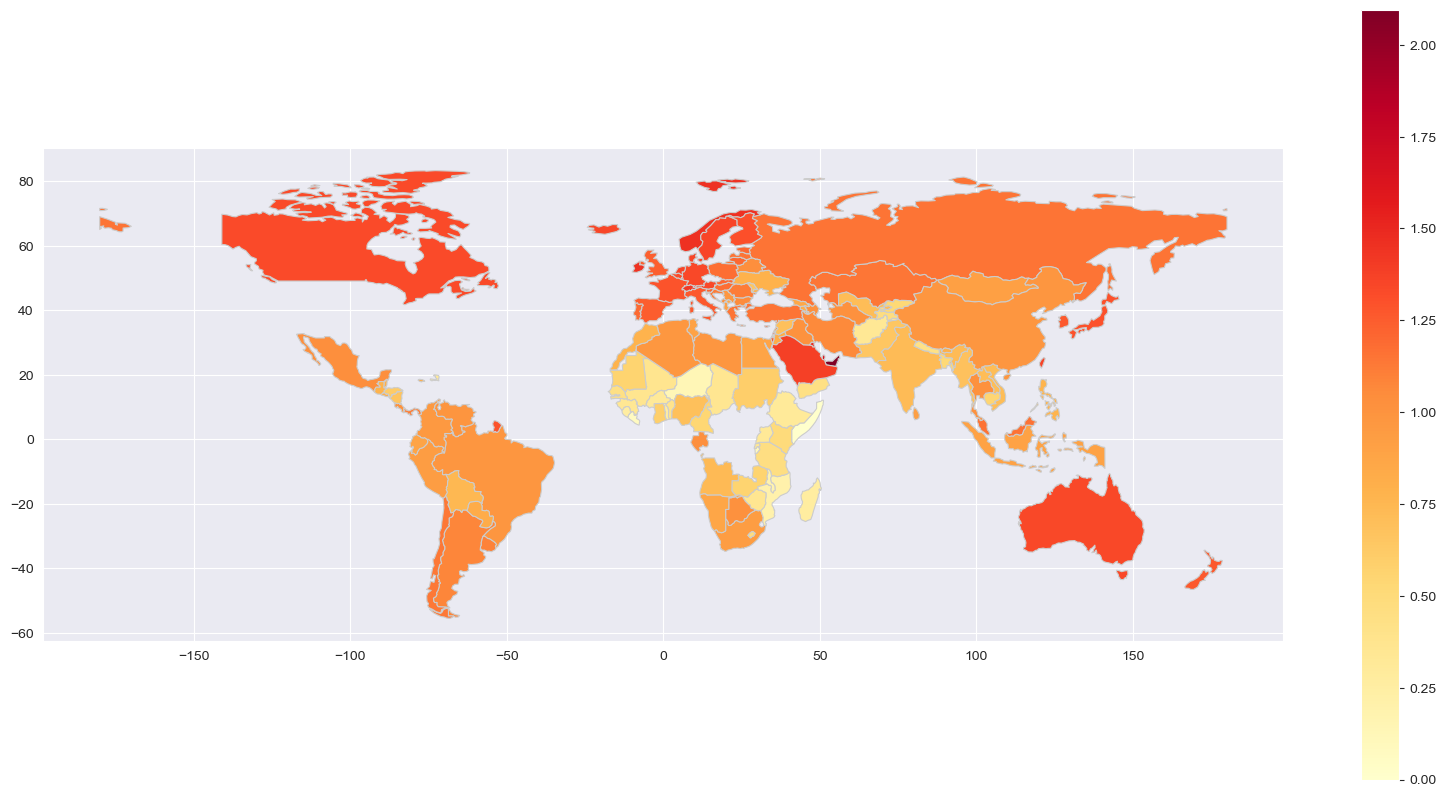

In [715]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(whr_sub_data_2018, left_on='name', right_on='Country')

fig, ax = plt.subplots(figsize=(20, 10))


merged_data.plot(column='GDP per capita', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')


sm = plt.cm.ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['GDP per capita'])
cbar = plt.colorbar(sm)

plt.show()

/var/folders/vy/gsnv_lqx3p3gytc39kn9307w0000gn/T/ipykernel_87098/1320057687.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


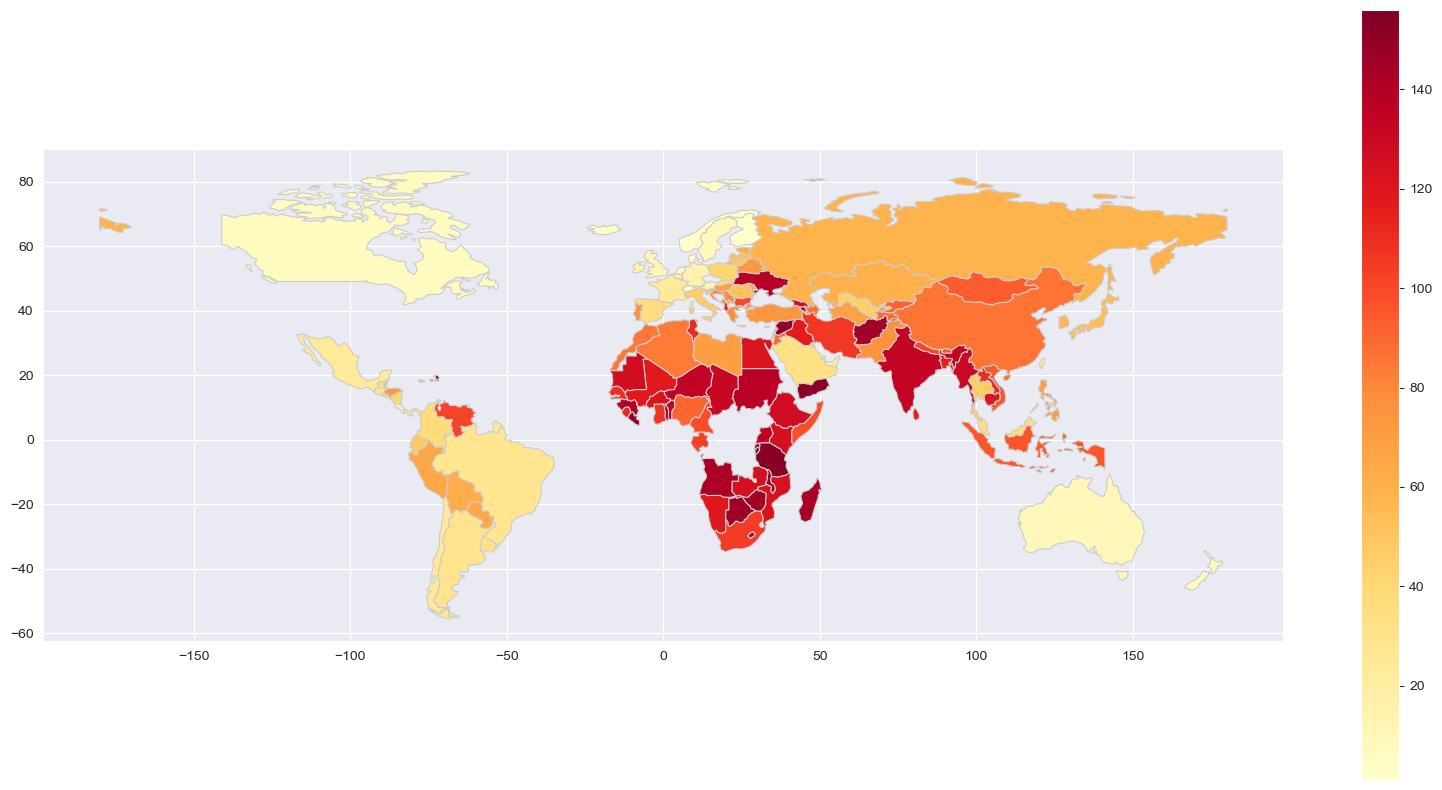

In [716]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(whr_sub_data_2018, left_on='name', right_on='Country')

fig, ax = plt.subplots(figsize=(20, 10))


merged_data.plot(column='Overall rank', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')


sm = plt.cm.ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['Overall rank'])
cbar = plt.colorbar(sm)

plt.show()

In conclusione, possiamo affermare con certezza che i fattori maggiori che influenzano le nazioni con un punteggio alto di felicità sono:
- "GDP per capita"
- "Social support"
- "Healthy life expectancy"

Le restanti variabili hanno un'influenza minore.

# Seconda analisi: misurazione della libertà personale, civile ed economico con il dataset The Human Freedom Index

## DISCOVERY

Il secondo dataset in cui si analizzerà i fattori socio-economici che influenzano la felicità di una nazione è il Human Freedom Index (https://www.cato.org/human-freedom-index/2022). Human Freedom Index presenta lo stato della libertà umana nel mondo sulla base di un'ampia misura che comprende la libertà personale, civile ed economica. Human Freedom Index misura le libertà economiche come la libertà di commerciare o di utilizzare denaro sonante, e cattura il grado in cui le persone sono libere di godere delle principali libertà spesso chiamate libertà civili: libertà di parola, religione, associazione e assemblea, nei paesi oggetto dell'indagine. Inoltre, include indicatori sullo stato di diritto, criminalità e violenza, libertà di movimento e discriminazione legale nei confronti delle relazioni omosessuali. Includiamo anche cinque variabili relative alle libertà specifiche delle donne che si trovano in varie categorie dell'indice.

Il dataset presenta 141 colonne divise:
- caratteristiche generali come: anno, regione e punteggio generale
- libertà politica (i nomi delle colonne iniziano con pf:"political freedom")
- libertà economica (i nomi delle colonne iniziano con ef: "economic freedom")


__L'obiettivo è esaminare le libertà economiche e sociali nei diversi continenti. Considerando che la libertà è un fattore che influenza la felicità, si analizzeranno i continenti in cui esistono le maggiori libertà sia dal punto di vista sociale che economico.__


## DATA SELECTION

Le fonti che vengono utilizzate sono presenti su Kaggle:
 - https://www.kaggle.com/datasets/gsutters/the-human-freedom-index?resource=download&select=hfi_cc_2022.csv

verrà considerato il dataset "hfi_cc_2022" in cui sono presenti i dati raccolti dal 2000 al 2020

In [717]:
df_hfi = pd.read_csv("dataset_hfi/hfi_cc_2022.csv")

In [718]:
df_hfi.head()

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_income_data,ef_government_tax_payroll,ef_government_tax_payroll_data,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2020,Albania,Eastern Europe,7.67,47.0,2.0,5.903741,4.725831,4.047825,7.194198,4.771938,9.343023,2.260000,10.0,10.000000,0.0,7.5,10.000000,0.0,10.000000,0.0,6.8475,9.7475,9.156429,9.249726,9.5725,9.8625,9.8775,9.770833,3.333333,6.552083,9.3400,10.000000,9.670000,9.8450,9.757500,8.3500,7.5,10.000000,10.000000,9.166667,9.5400,9.4600,7.7200,8.906667,8.2225,8.661458,10.0,0,10.000000,0,10.00000,6.6900,4.6075,3.2775,7.383333,5.713333,5.534333,5.0,6.666667,3.333333,6.106867,10.0,10.0,10.0,7.5,NaN,NaN,7.5,10.0,8.75,7.69,58.0,8.026471,12.71,6.978202,11.590000,7.545714,23.59,9.0,23,7.0,34,8.0,8.5350,7.817077,4.194511,4.073332,3.841150,8.333333,5.403750,3.913506,6.715384,5.607842,1.000000,5.260351,9.783394,1.083032,9.693881,0.765299,9.6758,1.621,10.0,9.788269,9.573333,0.64,9.28,3.6,8.0848,4.788,8.979378,6.807307,9.405328,8.106317,10.000000,4.168718,4.615385,8.6288,5.804301,8.222499,10.0,3.768482,10.0,7.922827,5.566667,4.865385,5.575783,8.0,6.29974

In [719]:
df_hfi.columns

Index(['year', 'countries', 'region', 'hf_score', 'hf_rank', 'hf_quartile',
       'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol_vdem',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_burden',
       'ef_regulation_business_start', 'ef_regulation_business_impartial',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=141)

In [720]:
df_hfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Columns: 141 entries, year to ef_rank
dtypes: float64(133), int64(3), object(5)
memory usage: 3.7+ MB


per raggiungere l'obiettivo stabilito, è stato deciso di analizzare le seguenti variabili:
- year
- countries
- region
- hf_score
- hf_rank
- pf_score
- ef_score

## DATA CLEANING

In questa fase, verrà pulito il dataset e considerato lo score generale dell'ambito socio-politico ed economico:
- pf_score
- ef_score


Dopo un'analisi delle varie colonne del dataset, queste due colonne riassumono i vari punteggi della libertà politica ed economica delle varie colonne presenti. Inoltre, non è necessario fare un'analisi specifica su un concetto della libertà politica, sociale ed economica



In [721]:
df_hfi_clean = df_hfi.loc[: , ["year", "countries", "region", "hf_score", "hf_rank", "pf_score", "ef_score"]]

Si controlla se ci sono valori nulli o NaN nel dataset:

In [722]:
df_hfi_clean.isna().sum()

year           0
countries      0
region         0
hf_score     382
hf_rank      382
pf_score     382
ef_score     382
dtype: int64

In [723]:
df_hfi_clean.isnull().sum()

year           0
countries      0
region         0
hf_score     382
hf_rank      382
pf_score     382
ef_score     382
dtype: int64

Nel dataset sono presenti dei valori mancanti nelle colonne "hf_score", "hf_rank", "pf_score" e "ef_score". Facendo un'analisi dei vari dati, si voleva effettuare una sostituzione con dei dati degli anni precedenti, ma questo avrebbe potuto portare a risultati imprecisi e fuorvianti. Infatti, le posizioni in classifica sono determinate da un insieme di fattori che possono cambiare nel tempo, come il PIL, il supporto sociale, l'istruzione, etc. Quindi si è deciso di eliminare i dati mancanti, anche se rappresentano l'11% del totale dei dati. La loro rimozione non influirà in modo significativo sull'accuratezza dei dati.

In [724]:
df_hfi_clean = df_hfi_clean.dropna()
df_hfi_clean.isnull().sum()

year         0
countries    0
region       0
hf_score     0
hf_rank      0
pf_score     0
ef_score     0
dtype: int64

## DATA EXPLORATION

In [725]:
df_hfi_clean.describe()

,year,hf_score,hf_rank,pf_score,ef_score
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2010.575089,7.137230,74.438210,7.373876,6.806610
std,5.992461,1.231567,43.566679,1.577346,0.991279
min,2000.000000,3.150000,1.000000,2.080000,2.720000
25%,2006.000000,6.210000,37.000000,6.120000,6.130000
50%,2011.000000,7.230000,74.000000,7.570000,6.930000
75%,2016.000000,8.180000,110.000000,8.700000,7.580000
max,2020.000000,9.300000,165.000000,9.690000,9.100000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'hf_score'}>],
       [<AxesSubplot:title={'center':'hf_rank'}>,
        <AxesSubplot:title={'center':'pf_score'}>],
       [<AxesSubplot:title={'center':'ef_score'}>, <AxesSubplot:>]],
      dtype=object)

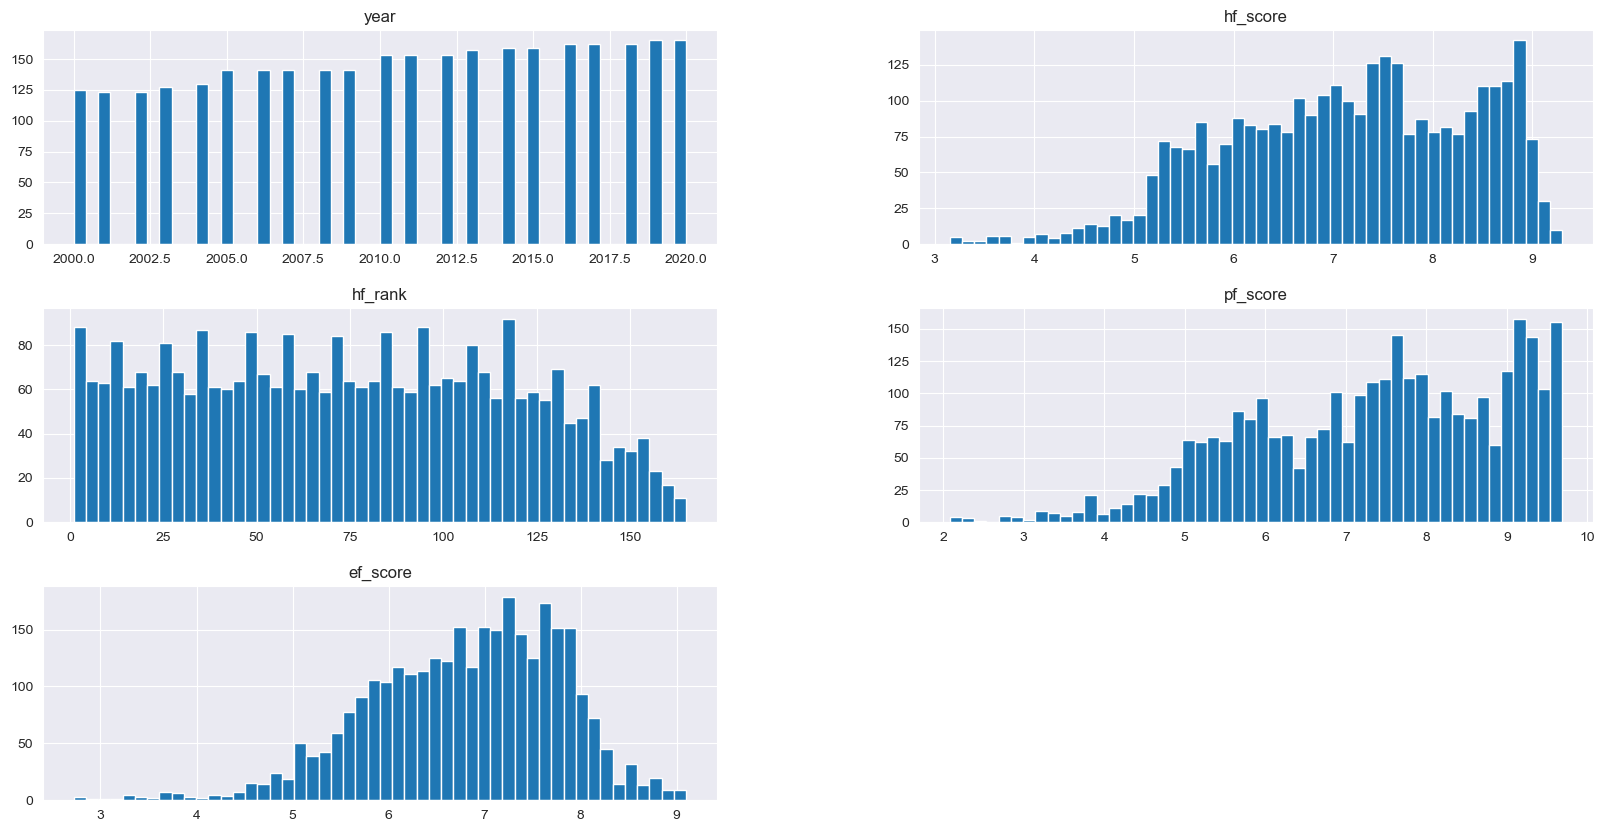

In [726]:
df_hfi_clean.hist(bins=50, figsize=(20,10))

per il boxplot, sono stati considerati le colonne che hanno maggiore importanza

<AxesSubplot:>

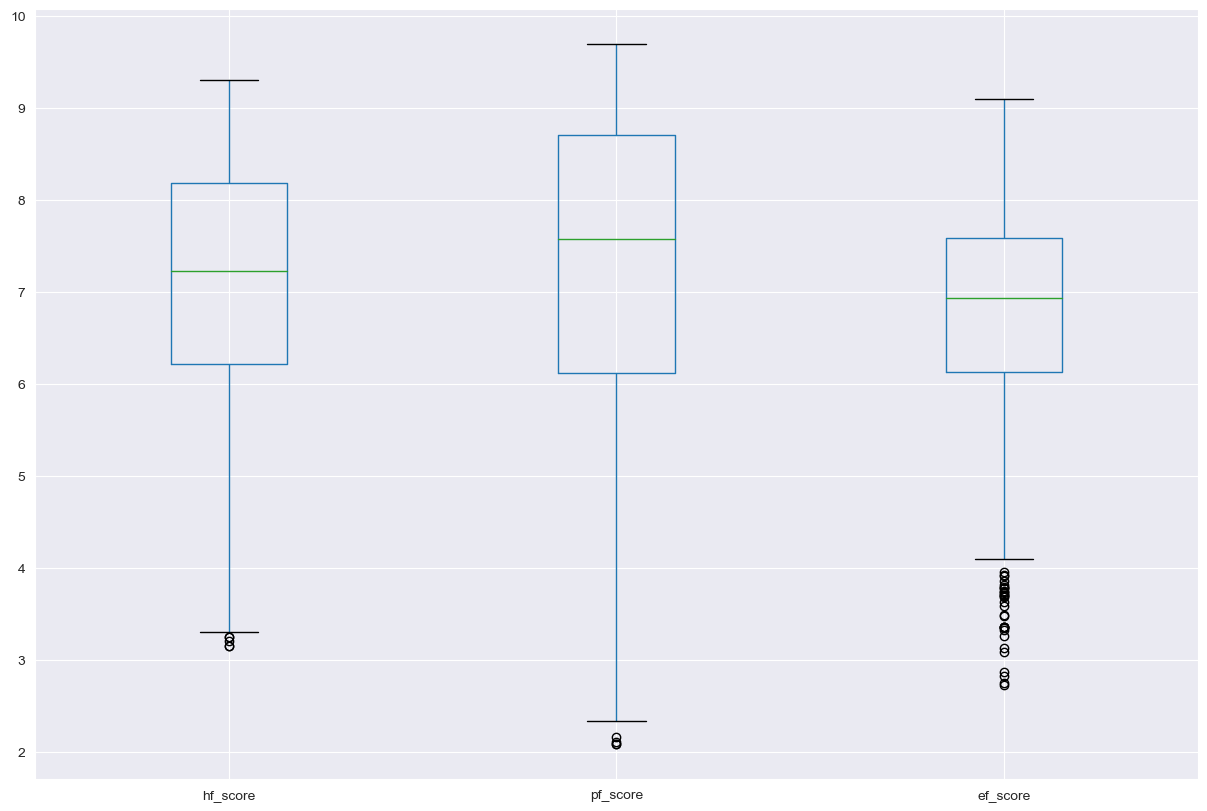

In [727]:
df_hfi_subset = df_hfi_clean.loc[: , ["hf_score", "pf_score", "ef_score"]]
df_hfi_subset.boxplot(figsize=(15,10))

le tre variabili hanno vari outliers, s'inizia con la variabile PF Score:

In [728]:
df_hfi_clean[df_hfi_clean["pf_score"] < 2.4]

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
144,2020,Syrian Arab Republic,Middle East & North Africa,3.30,165.0,2.34,4.63
309,2019,Syrian Arab Republic,Middle East & North Africa,3.36,165.0,2.34,4.80
474,2018,Syrian Arab Republic,Middle East & North Africa,3.45,162.0,2.33,5.02
639,2017,Syrian Arab Republic,Middle East & North Africa,3.15,162.0,2.16,4.53
804,2016,Syrian Arab Republic,Middle East & North Africa,3.15,162.0,2.11,4.61
969,2015,Syrian Arab Republic,Middle East & North Africa,3.25,159.0,2.08,4.88
1134,2014,Syrian Arab Republic,Middle East & North Africa,3.25,159.0,2.08,4.88


i vari outliers appartengono alla stessa nazione in anni differenti, un dataset con anni differenti potrebbe compromettere l'analisi del dataset. analizziamo la variabile successiva:

In [729]:
df_hfi_clean[df_hfi_clean["hf_score"] < 3.3]

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
639,2017,Syrian Arab Republic,Middle East & North Africa,3.15,162.0,2.16,4.53
804,2016,Syrian Arab Republic,Middle East & North Africa,3.15,162.0,2.11,4.61
969,2015,Syrian Arab Republic,Middle East & North Africa,3.25,159.0,2.08,4.88
1134,2014,Syrian Arab Republic,Middle East & North Africa,3.25,159.0,2.08,4.88
1299,2013,Syrian Arab Republic,Middle East & North Africa,3.20,157.0,2.42,4.29


anche in questa variabile, gli outliers fanno parte di dati della stessa nazione ma in anni diversi.

In [730]:
df_hfi_clean[df_hfi_clean["ef_score"] < 4.09]

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.65,3.32
305,2019,Sudan,Sub-Saharan Africa,4.04,162.0,4.38,3.58
325,2019,"Venezuela, RB",Latin America & the Caribbean,3.90,164.0,4.64,2.87
470,2018,Sudan,Sub-Saharan Africa,3.46,161.0,3.27,3.72
490,2018,"Venezuela, RB",Latin America & the Caribbean,4.15,159.0,4.71,3.36
655,2017,"Venezuela, RB",Latin America & the Caribbean,3.97,160.0,4.87,2.72
820,2016,"Venezuela, RB",Latin America & the Caribbean,4.14,159.0,5.14,2.75
985,2015,"Venezuela, RB",Latin America & the Caribbean,4.47,155.0,5.65,2.82
1150,2014,"Venezuela, RB",Latin America & the Caribbean,4.60,155.0,5.68,3.08
1315,2013,"Venezuela, RB",Latin America & the Caribbean,4.70,154.0,5.83,3.13


anche in questa variabile, gli outliers appartengono alla stessa nazione ma in anni diversi. per evitare che le analisi non siano completi o accurati, si è deciso di utilizzare i dati di un anno specifico, il più recente, il 2020:

In [731]:
df_hfi_clean_2020 =df_hfi_clean[df_hfi_clean["year"] == 2020]
df_hfi_clean_2020

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
0,2020,Albania,Eastern Europe,7.67,47.0,7.69,7.64
1,2020,Algeria,Middle East & North Africa,5.13,154.0,5.13,5.12
2,2020,Angola,Sub-Saharan Africa,5.97,122.0,6.02,5.91
3,2020,Argentina,Latin America & the Caribbean,6.99,74.0,8.51,4.87
4,2020,Armenia,Caucasus & Central Asia,8.14,26.0,8.35,7.84
...,...,...,...,...,...,...,...
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.65,3.32
161,2020,Vietnam,South Asia,5.64,132.0,5.08,6.42
162,2020,"Yemen, Rep.",Middle East & North Africa,3.94,164.0,2.71,5.67
163,2020,Zambia,Sub-Saharan Africa,6.38,109.0,6.25,6.56


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'hf_score'}>],
       [<AxesSubplot:title={'center':'hf_rank'}>,
        <AxesSubplot:title={'center':'pf_score'}>],
       [<AxesSubplot:title={'center':'ef_score'}>, <AxesSubplot:>]],
      dtype=object)

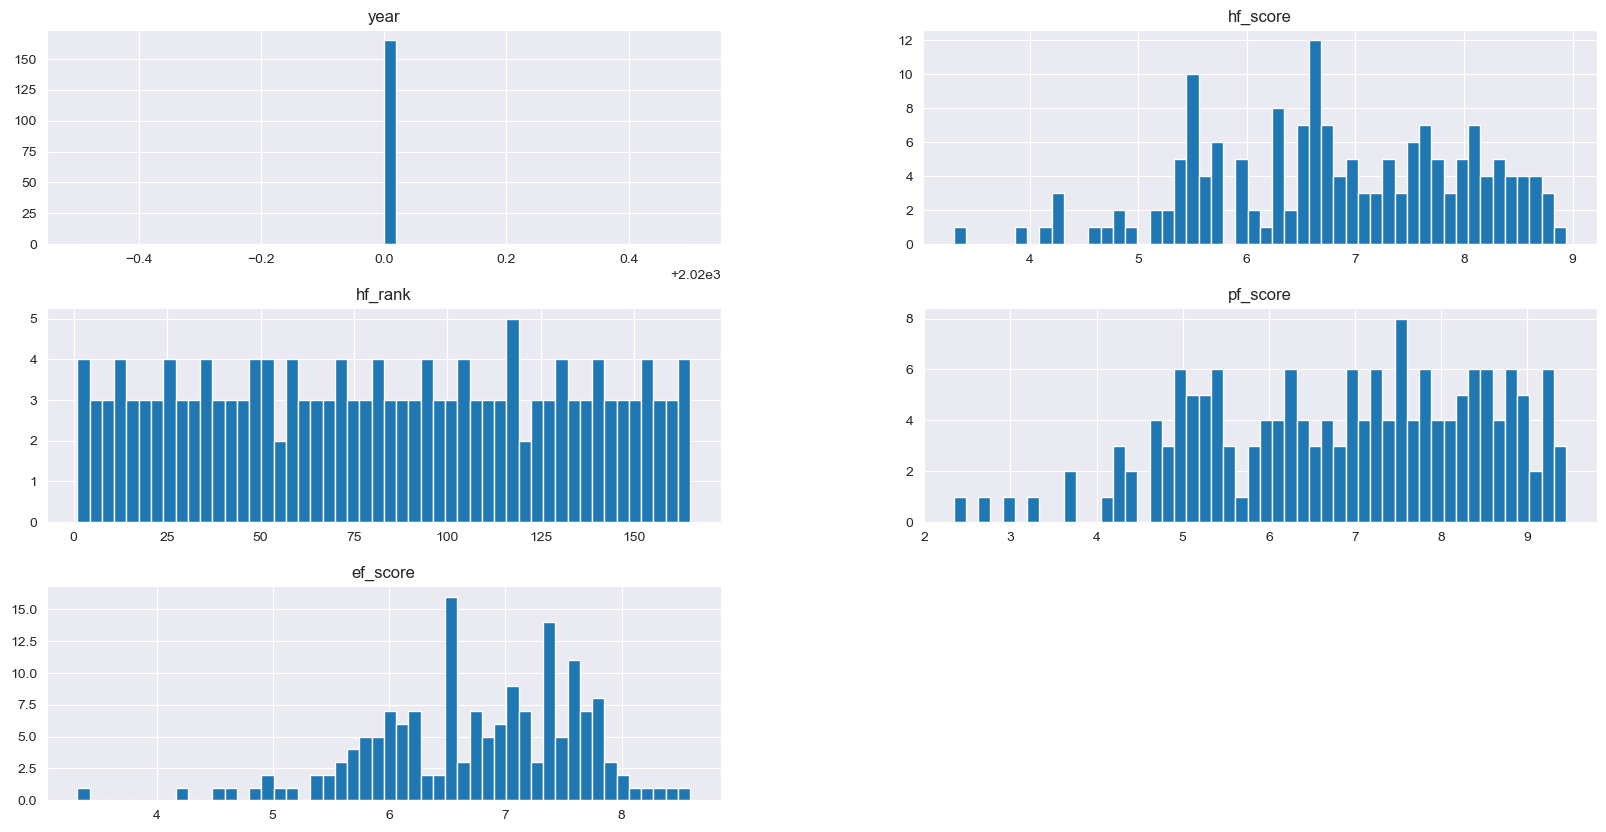

In [732]:
df_hfi_clean_2020.hist(bins=50, figsize=(20,10))

analizzando solo un anno, l'andamento dell'istogramma non è cambiato, cioè è inclinato verso sinistra 

<AxesSubplot:>

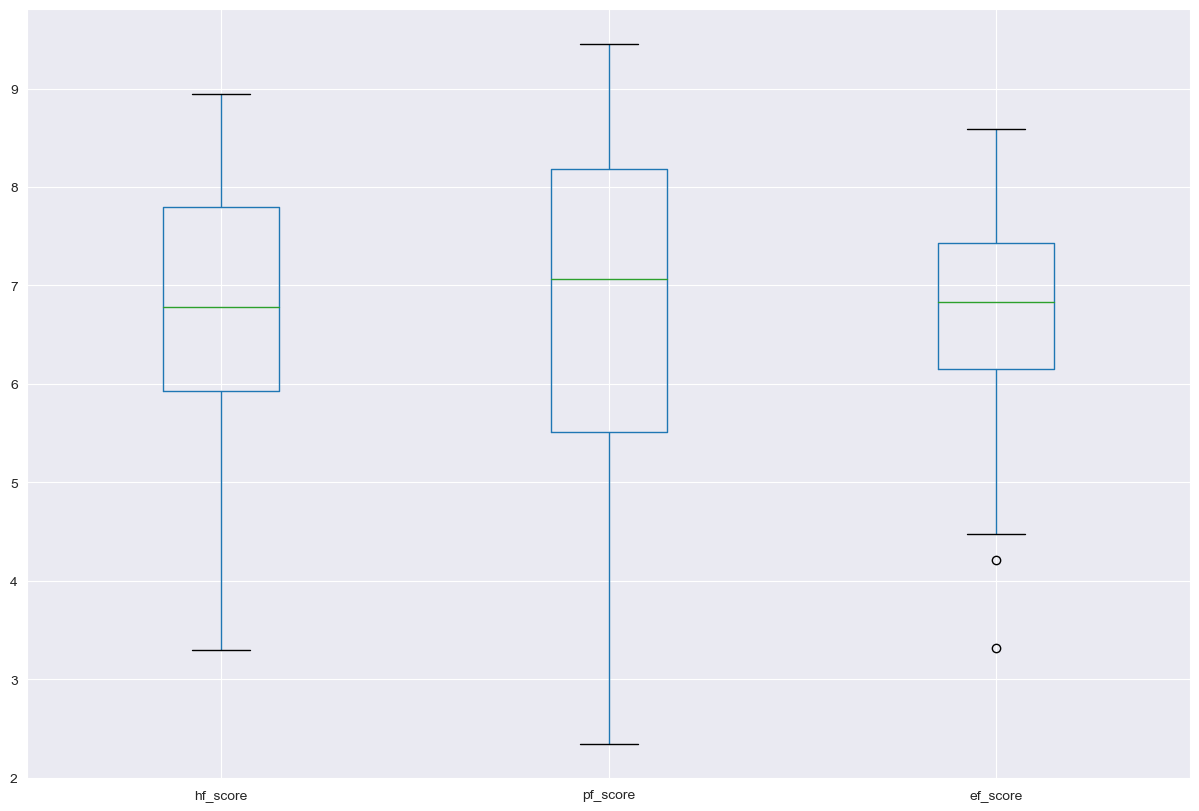

In [733]:
df_hfi_clean_2020_subset = df_hfi_clean_2020.loc[: , ["hf_score", "pf_score", "ef_score"]]
df_hfi_clean_2020_subset.boxplot(figsize=(15,10))

in questo caso, il boxplot è più chiaro ed sono presenti degli outliers nella variabile ef_score.

In [734]:
df_hfi_clean_2020[df_hfi_clean_2020['ef_score'] <= 4.21]

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
140,2020,Sudan,Sub-Saharan Africa,4.31,160.0,4.38,4.21
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.65,3.32


In questo caso sono presenti solo 2 outliers, il punteggio del Venezuela e Sudan non dovrebbero condizionare le fasi successive di analisi

Nel rapporto precedente, è stato evidenziato che i fattori più rilevanti per la felicità includono:

- Il PIL pro capite
- Il supporto sociale
- L'aspettativa di vita in buona salute

Inoltre, la libertà è stata identificata come un fattore secondario, ma comunque presente nel contesto della felicità nazionale. In questa analisi, esamineremo i punteggi delle libertà economiche, politiche e sociali, suddivisi per continente, utilizzando un dataset leggermente più ampio a nostra disposizione

Si divideranno i vari dati per continente

In [735]:
df_hfi_clean_2020

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
0,2020,Albania,Eastern Europe,7.67,47.0,7.69,7.64
1,2020,Algeria,Middle East & North Africa,5.13,154.0,5.13,5.12
2,2020,Angola,Sub-Saharan Africa,5.97,122.0,6.02,5.91
3,2020,Argentina,Latin America & the Caribbean,6.99,74.0,8.51,4.87
4,2020,Armenia,Caucasus & Central Asia,8.14,26.0,8.35,7.84
...,...,...,...,...,...,...,...
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.65,3.32
161,2020,Vietnam,South Asia,5.64,132.0,5.08,6.42
162,2020,"Yemen, Rep.",Middle East & North Africa,3.94,164.0,2.71,5.67
163,2020,Zambia,Sub-Saharan Africa,6.38,109.0,6.25,6.56


In [736]:
df_hfi_clean_2020["region"].value_counts()

Sub-Saharan Africa               45
Latin America & the Caribbean    26
Eastern Europe                   22
Middle East & North Africa       19
Western Europe                   18
South Asia                       17
Caucasus & Central Asia           6
East Asia                         6
Oceania                           4
North America                     2
Name: region, dtype: int64

In [737]:
df_hfi_clean_2020_AFA = df_hfi_clean_2020.loc[(df_hfi_clean_2020["region"] == "Sub-Saharan Africa") |(df_hfi_clean_2020["region"] == "Middle East & North Africa")]
df_hfi_clean_2020_EU = df_hfi_clean_2020.loc[(df_hfi_clean_2020["region"] == "Western Europe") | (df_hfi_clean_2020["region"] == "Eastern Europe")]
df_hfi_clean_2020_LAC = df_hfi_clean_2020.loc[df_hfi_clean_2020["region"] == "Latin America & the Caribbean"]
df_hfi_clean_2020_AS = df_hfi_clean_2020.loc[(df_hfi_clean_2020["region"] == "Caucasus & Central Asia") | (df_hfi_clean_2020["region"] == "South Asia") | (df_hfi_clean_2020["region"] == "East Asia")]
df_hfi_clean_2020_NA = df_hfi_clean_2020.loc[df_hfi_clean_2020["region"] == "North America"]
df_hfi_clean_2020_OC = df_hfi_clean_2020.loc[df_hfi_clean_2020["region"] == "Oceania"]

tot_data_hfi = len(df_hfi_clean_2020)

dict_continent_hfi = {"afa": df_hfi_clean_2020_AFA, "eu": df_hfi_clean_2020_EU, "lac": df_hfi_clean_2020_LAC, "as": df_hfi_clean_2020_AS, "na": df_hfi_clean_2020_NA, "anz": df_hfi_clean_2020_OC}

print_percent(dict_continent_hfi, tot_data_hfi)

Numero totale di dati: 165!
Percentuale Africa: 39%
Percentuale Europa: 24%
Percentuale Asia: 18%
Percentuale Nord America: 1%
Percentuale Australia e Nuova Zelanda: 2%
Percentuale Sud America e Caraibi: 16%


In [738]:
print_percent(dict_cont=dict_continent, total_num=tot_data)

Numero totale di dati: 158!
Percentuale Africa: 38%
Percentuale Europa: 32%
Percentuale Asia: 14%
Percentuale Nord America: 1%
Percentuale Australia e Nuova Zelanda: 1%
Percentuale Sud America e Caraibi: 14%


Nel 2020, il dataset delle libertà economiche e sociali ha registrato un aumento del numero di nazioni rispetto al dataset della felicità del 2015. Questo ha portato a una ridefinizione dei pesi tra i vari continenti. L'unico continente che ha avuto il numero massimo di nazioni è l'America del Nord.

Si analizzerà la media per ogni continente per poter fare un confronto con i risultati dell'analisi precedente:

In [739]:
hfi_mean_AFA = create_df_mean_continent(df_hfi_clean_2020_AFA, "hf_score", "pf_score","ef_score")

hfi_mean_AFA

,Mean hf_score,Mean pf_score,Mean ef_score
0,5.955,5.78875,6.187031


In [740]:
hfi_mean_EU = create_df_mean_continent(df_hfi_clean_2020_EU, "hf_score", "pf_score","ef_score")

hfi_mean_EU

,Mean hf_score,Mean pf_score,Mean ef_score
0,7.9565,8.33625,7.42525


In [741]:
hfi_mean_AS = create_df_mean_continent(df_hfi_clean_2020_AS, "hf_score", "pf_score","ef_score")

hfi_mean_AS

,Mean hf_score,Mean pf_score,Mean ef_score
0,6.656897,6.425862,6.970345


In [742]:
hfi_mean_NA = create_df_mean_continent(df_hfi_clean_2020_NA, "hf_score", "pf_score","ef_score")

hfi_mean_NA

,Mean hf_score,Mean pf_score,Mean ef_score
0,8.35,8.685,7.89


In [743]:
hfi_mean_OC = create_df_mean_continent(df_hfi_clean_2020_OC, "hf_score", "pf_score","ef_score")

hfi_mean_OC

,Mean hf_score,Mean pf_score,Mean ef_score
0,7.88,8.325,7.2525


In [744]:
hfi_mean_LAC = create_df_mean_continent(df_hfi_clean_2020_LAC, "hf_score", "pf_score","ef_score")

hfi_mean_OC

,Mean hf_score,Mean pf_score,Mean ef_score
0,7.88,8.325,7.2525


Analizzando le diverse medie, emerge che l'America del Nord ha ottenuto il punteggio più elevato per quanto riguarda le libertà economiche. Al contrario, il continente africano rimane in coda, con un punteggio di 6.18. Per quanto riguarda le libertà politiche e sociali, il continente nord americano si posiziona in cima con un punteggio di 8.685, mentre l'Africa continua a rimanere all'ultimo posto con un punteggio costante di 5.78.

Confrontando i risultati con l'analisi dei fattori della felicità suddividendo le nazioni per continenti, si riscontra una somiglianza nei risultati. La differenza si manifesta solo per il settore politico-sociale, in cui il continente americano ha superato l'Oceania.

Nella fase di visualizzazione dei dati, esamineremo graficamente le riflessioni fatte precedentemente.

## DATA TRANSFORMATION

In questa fase, verrà modificato il dataframe per poter renderlo utilizzabile per la fase di data visualization.
S'inizierà con l'ordinamento del dataframe per posizione in base al punteggio dello human freedom index:

In [745]:
df_hfi_clean_2020 = df_hfi_clean_2020.sort_values(by="hf_rank", ascending=True)

df_hfi_clean_2020

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
143,2020,Switzerland,Western Europe,8.94,1.0,9.35,8.37
109,2020,New Zealand,Oceania,8.75,2.0,9.09,8.27
48,2020,Estonia,Eastern Europe,8.73,3.0,9.28,7.95
42,2020,Denmark,Western Europe,8.72,4.0,9.17,8.09
73,2020,Ireland,Western Europe,8.70,5.0,9.30,7.86
...,...,...,...,...,...,...,...
46,2020,"Egypt, Arab Rep.",Middle East & North Africa,4.28,161.0,3.32,5.61
71,2020,"Iran, Islamic Rep.",Middle East & North Africa,4.26,162.0,3.76,4.96
160,2020,"Venezuela, RB",Latin America & the Caribbean,4.09,163.0,4.65,3.32
162,2020,"Yemen, Rep.",Middle East & North Africa,3.94,164.0,2.71,5.67


Si calcola la correlazione tra i punteggi di libertà ed altre variabili:

In [746]:
df_hfi_clean_2020_selected_column = df_hfi_clean_2020.loc[:, ["year", "hf_score", "hf_rank", "pf_score", "ef_score"]]
corr_hfi = df_hfi_clean_2020_selected_column.corr()

## DATA VISUALIZATION

Si analizza la correlazione tra i punteggi di libertà:

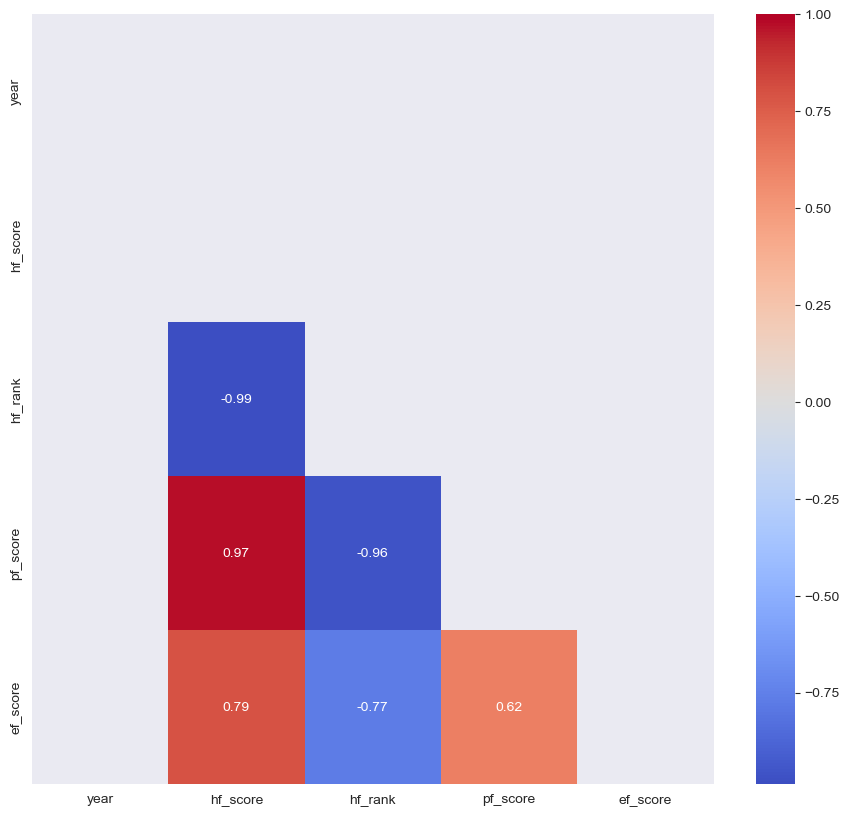

In [747]:
draw_graph_corr(corr_hfi)

Verrano considerate correlazioni forti o mediamente forti con valori superiori a 0.6, come nell'analisi precedente. Provando a fare un po' di chiarezza, ricavo i seguenti spunti:
- EF Score e PF Score sono mediamente forti. si può constatare che le due variabili sono interconnesse tra loro. Ad esempio, i paesi con un sistema politico democratico tendono anche ad avere un'economia di mercato, che offre ai cittadini più libertà di scelta economica.
- EF Score, PF Score sono fortemente correlate con hfi_score, cioè l'indice di felicità. Questo potrebbe essere dovuto al fatto che la libertà economica e politica consente alle persone di vivere in maniera significativa e autodeterminata, il che portà ad una maggiore felicità

Un altro modo per evidenziare la correlazione mediamente forte tra l'EF Score e il PF Score è mediante l'utilizzo di un grafico a dispersione:

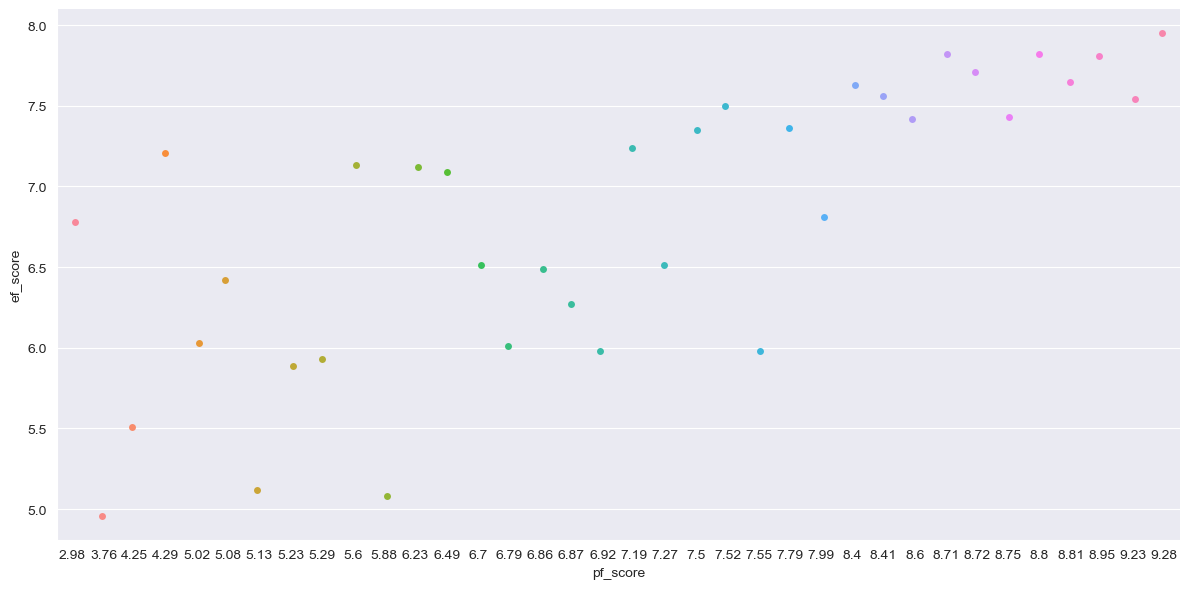

In [748]:
random_country_hfi = df_hfi_clean_2020.sample(n=36, random_state=42)
sns.catplot(data=random_country_hfi,  x='pf_score', y='ef_score', kind='strip',height=6, aspect=2)

Un altro modo per evidenziare la correlazione forte tra EF Score, PF Score e HF Score:

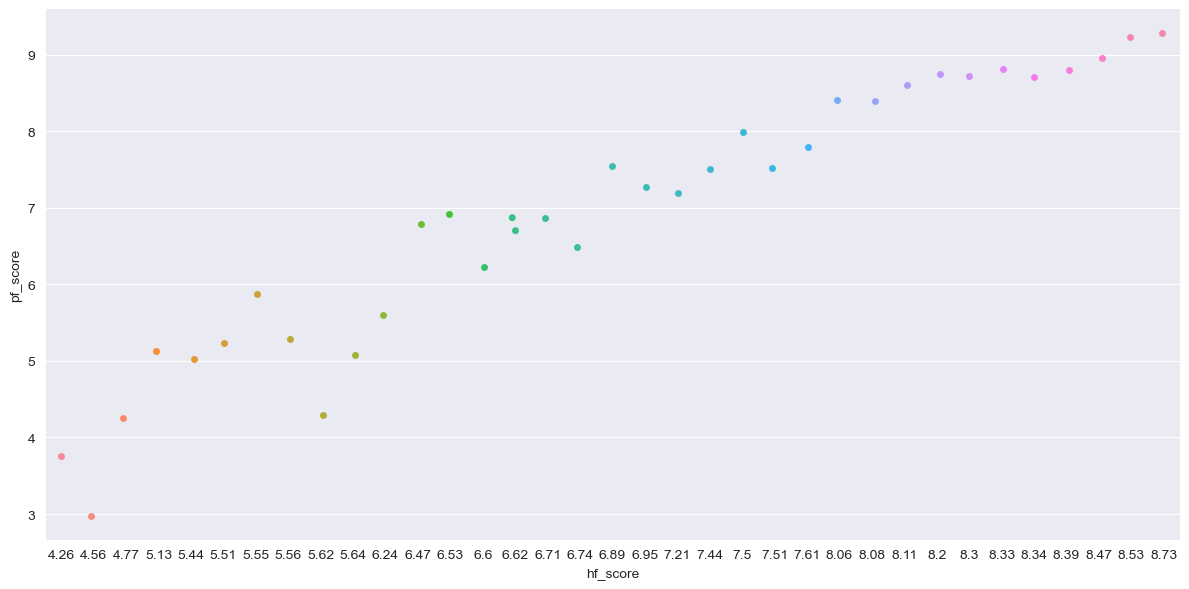

In [749]:
sns.catplot(data=random_country_hfi,  x='hf_score', y='pf_score', kind='strip',height=6, aspect=2)

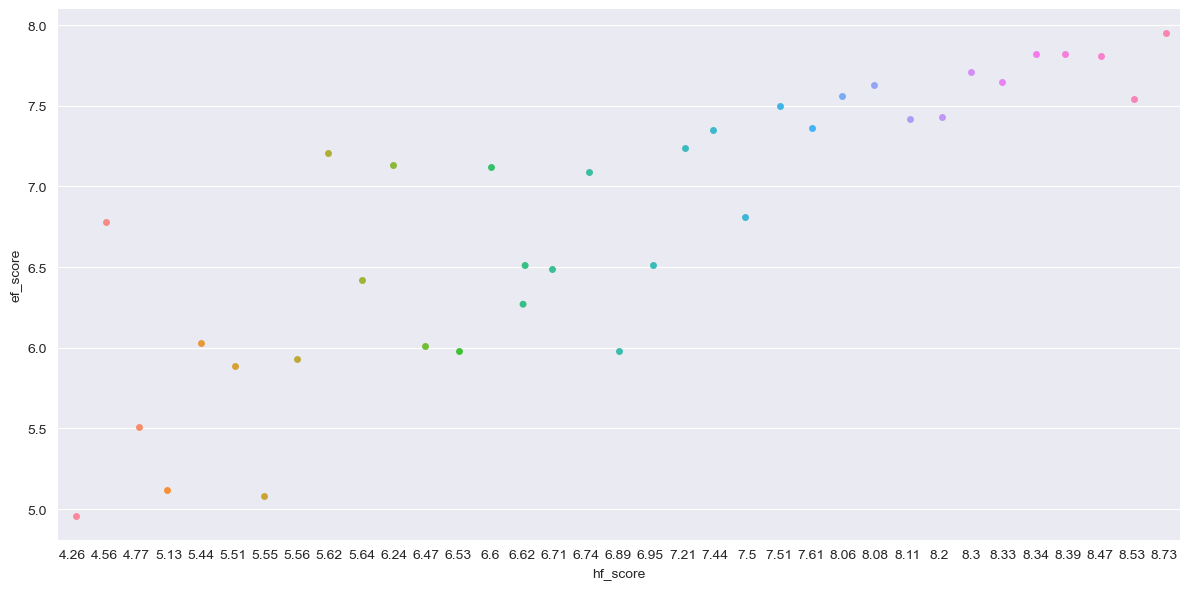

In [750]:
sns.catplot(data=random_country_hfi,  x='hf_score', y='ef_score', kind='strip',height=6, aspect=2)

La suddivisione del dataset per continenti, come analizzato nella fase di data exploration.

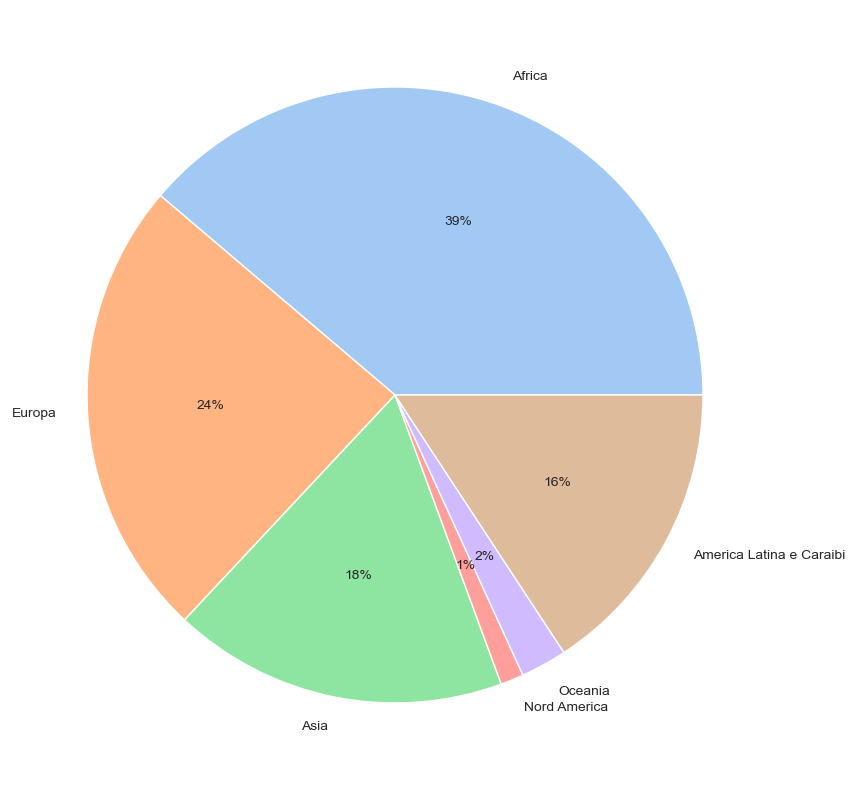

In [751]:
fraction_afa_hfi = calculate_fraction(len(df_hfi_clean_2020_AFA),tot_data_hfi)
fraction_eu_hfi =  calculate_fraction(len(df_hfi_clean_2020_EU), tot_data_hfi)
fraction_as_hfi = calculate_fraction(len(df_hfi_clean_2020_AS), tot_data_hfi)
fraction_na_hfi = calculate_fraction(len(df_hfi_clean_2020_NA), tot_data_hfi)
fraction_anz_hfi = calculate_fraction(len(df_hfi_clean_2020_OC), tot_data_hfi)
fraction_lac_hfi = calculate_fraction(len(df_hfi_clean_2020_LAC), tot_data_hfi)
data_decimal_score_hfi = [fraction_afa_hfi, fraction_eu_hfi, fraction_as_hfi, fraction_na_hfi, fraction_anz_hfi, fraction_lac_hfi]
names_score = ["Africa", "Europa", "Asia", "Nord America", "Oceania", "America Latina e Caraibi"]

plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:6]
plt.pie(data_decimal_score_hfi, labels = names_score, colors = colors, autopct='%.0f%%')
plt.show()

Text(0, 0.5, 'Economic Freedom Score')

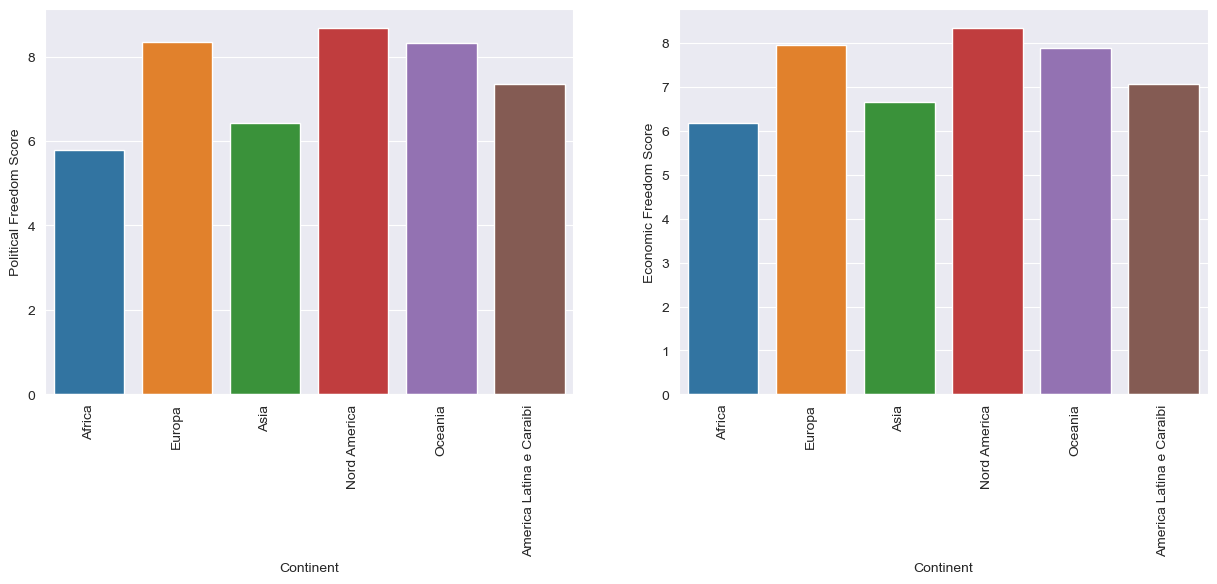

In [752]:
data_mean_ef = [hfi_mean_AFA.iloc[0,2],hfi_mean_EU.iloc[0,0], hfi_mean_AS.iloc[0,0], hfi_mean_NA.iloc[0,0],hfi_mean_OC.iloc[0,0], hfi_mean_LAC.iloc[0,0]]

data_mean_pf = [hfi_mean_AFA.iloc[0,1],hfi_mean_EU.iloc[0,1], hfi_mean_AS.iloc[0,1], hfi_mean_NA.iloc[0,1],hfi_mean_OC.iloc[0,1], hfi_mean_LAC.iloc[0,1]]


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

bp_pf = sns.barplot(ax=axes[0], x=names_score, y=data_mean_pf)
bp_ef = sns.barplot(ax=axes[1], x=names_score, y=data_mean_ef)

bp_ef.set_xticklabels(bp_ef.get_xticklabels(), rotation=90)
bp_pf.set_xticklabels(bp_pf.get_xticklabels(), rotation=90)

bp_pf.set_xlabel('Continent')
bp_pf.set_ylabel('Political Freedom Score')

bp_ef.set_xlabel('Continent')
bp_ef.set_ylabel('Economic Freedom Score')

Dall'analisi grafica emerge che il Nord America risulta essere il continente con maggiori livelli di libertà sia dal punto di vista economico che sociale. Al contrario, si osserva che il continente africano si colloca all'ultimo posto in questa classifica.

Un'altra forma di rappresentazione che evidenzia come il continente nordamericano goda di una maggiore libertà economica e sociale, mentre il continente africano ne abbia una minore:

/var/folders/vy/gsnv_lqx3p3gytc39kn9307w0000gn/T/ipykernel_87098/1247028372.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


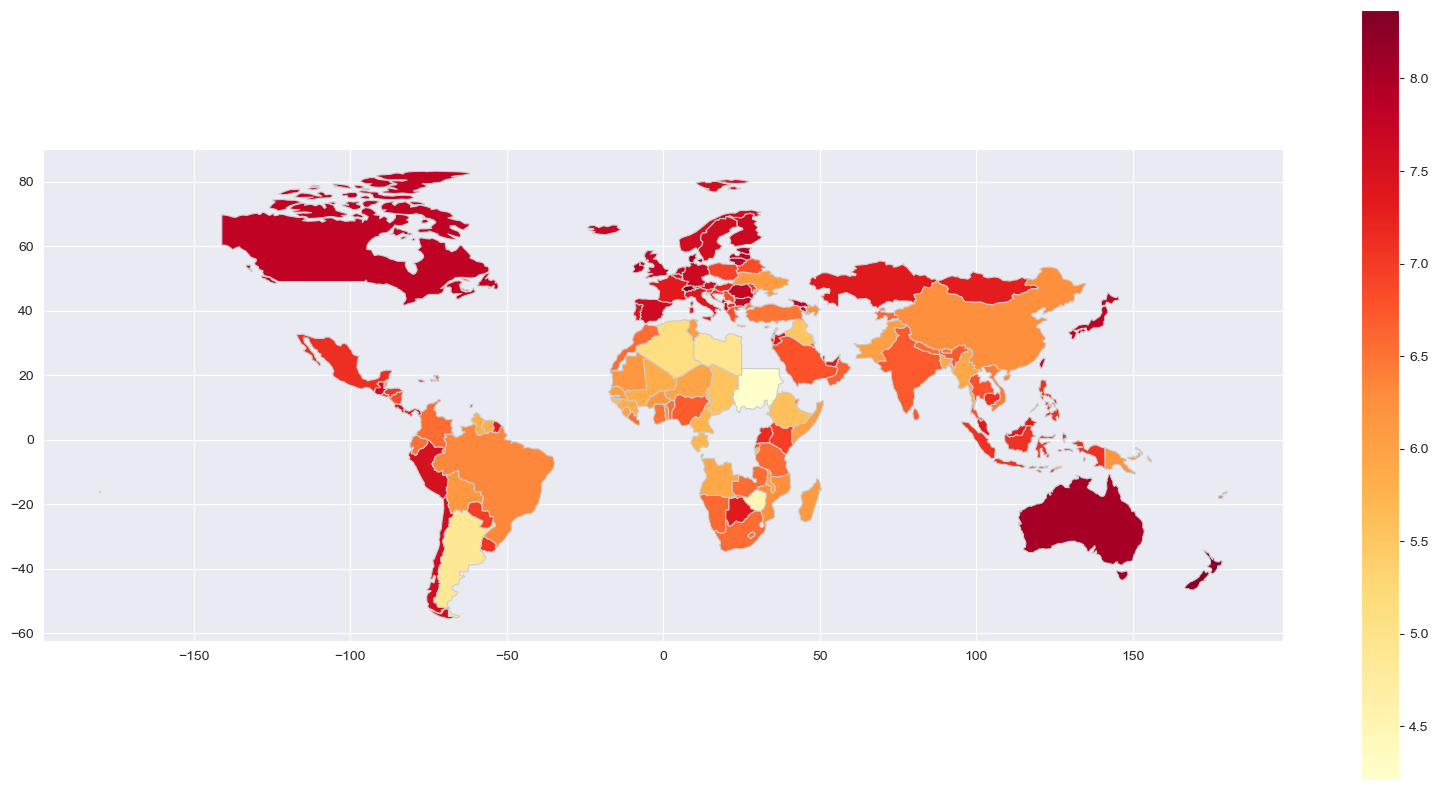

In [753]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(df_hfi_clean_2020, left_on='name', right_on='countries')

fig, ax = plt.subplots(figsize=(20, 10))


merged_data.plot(column='ef_score', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')


sm = plt.cm.ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['ef_score'])
cbar = plt.colorbar(sm)

plt.show()

Si sta analizzando come i punteggi relativi alla libertà economica, politica e sociale siano cambiati a partire dal 2000:

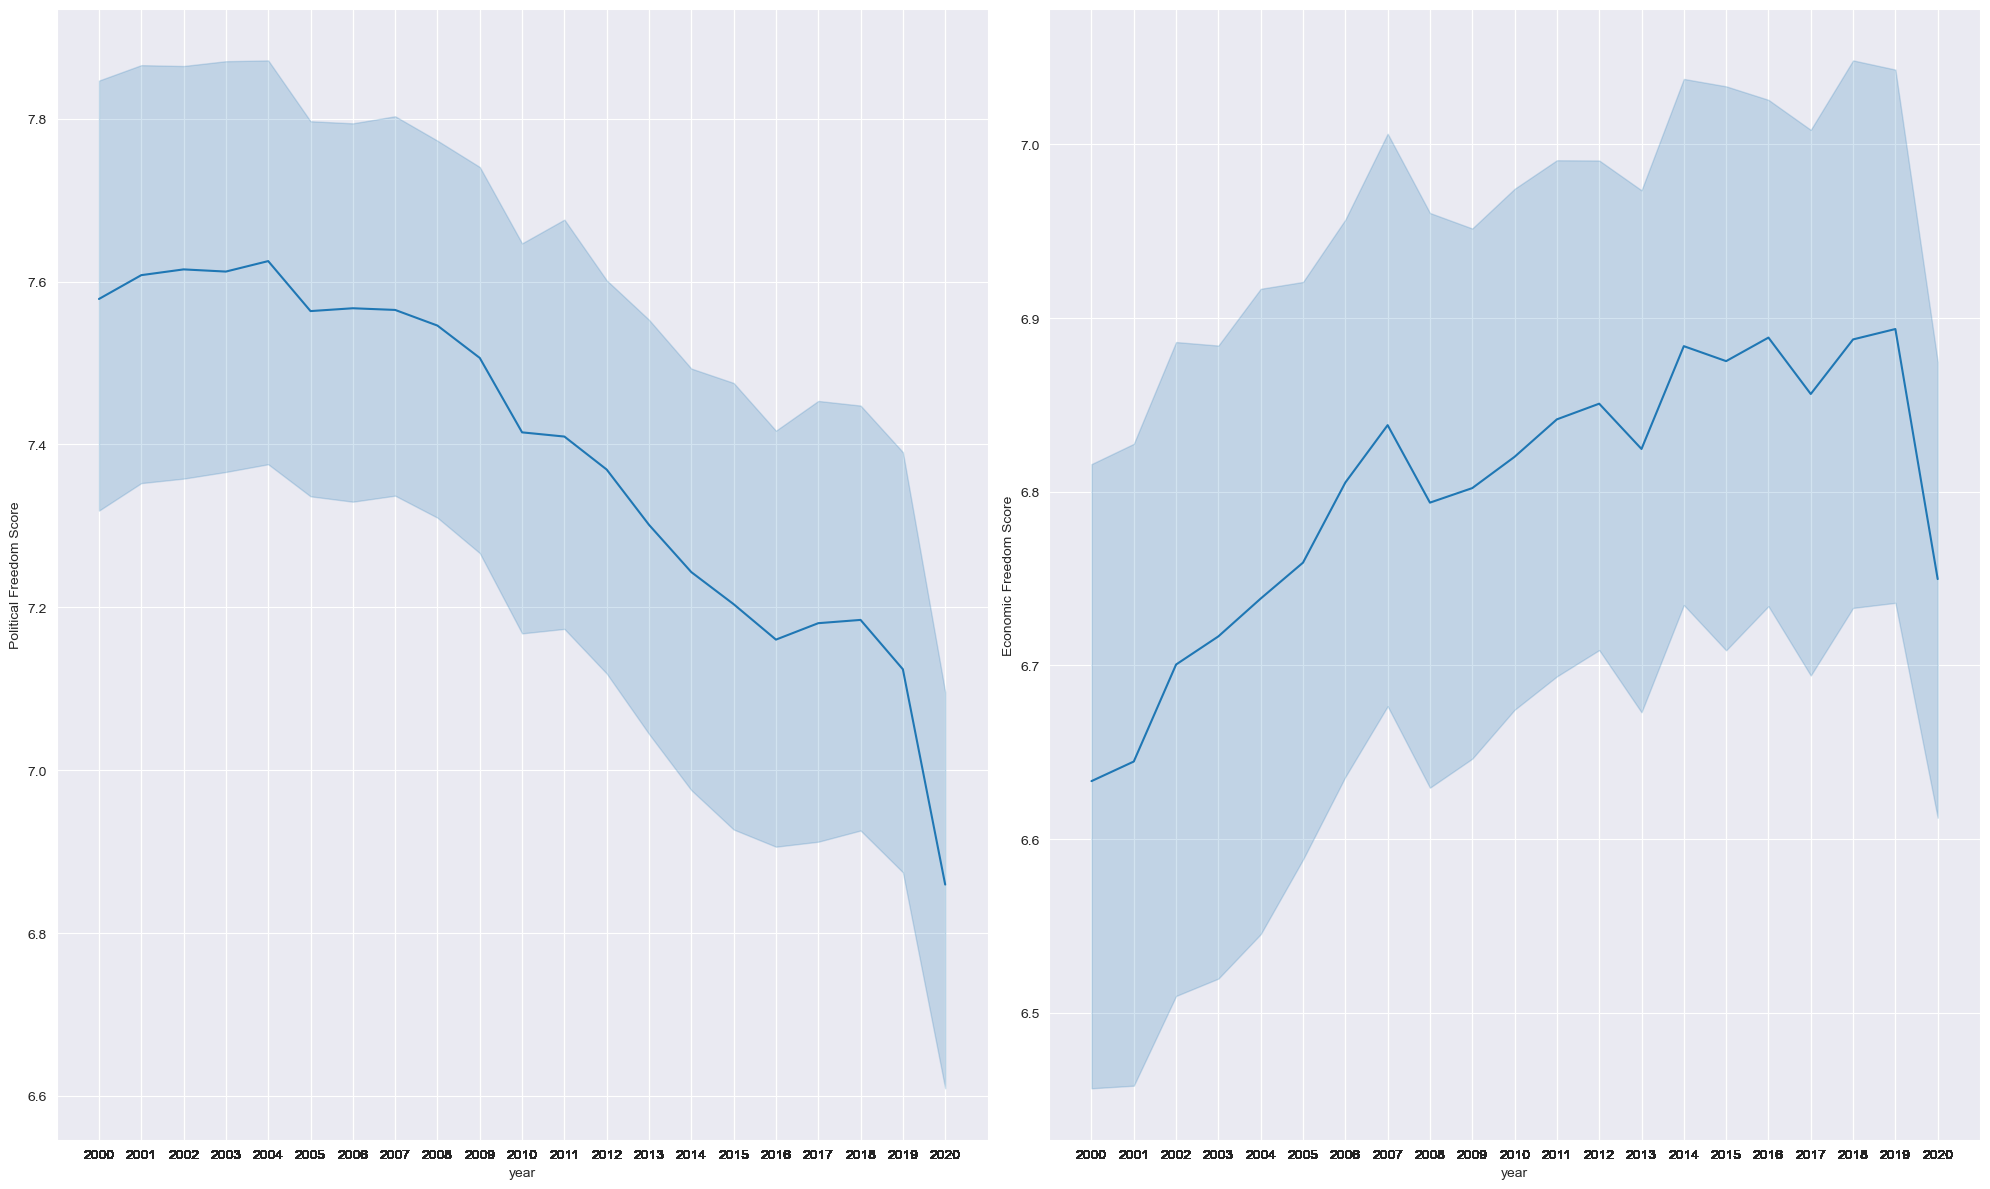

In [754]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

sns.lineplot(x='year', y='pf_score', data=df_hfi_clean, ax=axes[0])
sns.lineplot(x='year', y='ef_score', data=df_hfi_clean, ax=axes[1])

plt.xticks(df_hfi_clean['year'])

axes[0].set_xlabel('year')
axes[0].set_ylabel('Political Freedom Score')
axes[0].set_xticks(df_hfi_clean['year'])

axes[1].set_xlabel('year')
axes[1].set_ylabel('Economic Freedom Score')
axes[1].set_xticks(df_hfi_clean['year'])

plt.tight_layout()

plt.show()

Analizzando le libertà economiche, sociali e politiche, è possibile trarre le seguenti riflessioni dal campione intervistato:
    - In generale, le libertà politiche e sociali sono diminuite dagli anni 2000. Si è registrato un lieve aumento delle libertà nel 2004, ma successivamente si è verificata una costante diminuzione che è diventata particolarmente marcata a partire dal 2020, probabilmente dovuta alla pandemia affrontata. Di conseguenza, nel complesso, nel mondo vi è una diminuzione delle libertà politiche e sociali.
    - Nelle libertà economiche, si possono osservare delle oscillazioni nel corso dei 20 anni presi in considerazione. Il picco più elevato è stato raggiunto nel 2019, con un punteggio di circa 6.88 punti, mentre il punto più basso è stato registrato nel 2000, con un punteggio di 6.64. Anche per questa variabile, nel 2020 si è verificata una marcata diminuzione nel punteggio, molto probabilmente a causa delle conseguenze della pandemia.

In conclusione, possiamo affermare che, analizzando un dataset leggermente più ampio, si sono raggiunte conclusioni simili rispetto all'analisi precedente dei fattori della felicità. Tuttavia, va notato che vi è una differenza nei risultati riguardo alle libertà politiche e sociali, poiché l'Oceania ha perso la sua posizione in vetta in questo settore.